In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
#pd.set_option('display.max_colwidth', -1)

# Reading and understanding the data

In [3]:
tele_data = pd.read_csv("telecom_churn_data.csv")
tele_data.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [4]:
tele_data.shape

(99999, 226)

In [5]:
tele_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [6]:
tele_data.describe().T

count          mean            std           min  \
mobile_number       99999.0  7.001207e+09  695669.386290  7.000000e+09   
circle_id           99999.0  1.090000e+02       0.000000  1.090000e+02   
loc_og_t2o_mou      98981.0  0.000000e+00       0.000000  0.000000e+00   
std_og_t2o_mou      98981.0  0.000000e+00       0.000000  0.000000e+00   
loc_ic_t2o_mou      98981.0  0.000000e+00       0.000000  0.000000e+00   
arpu_6              99999.0  2.829874e+02     328.439770 -2.258709e+03   
arpu_7              99999.0  2.785366e+02     338.156291 -2.014045e+03   
arpu_8              99999.0  2.791547e+02     344.474791 -9.458080e+02   
arpu_9              99999.0  2.616451e+02     341.998630 -1.899505e+03   
onnet_mou_6         96062.0  1.323959e+02     297.207406  0.000000e+00   
onnet_mou_7         96140.0  1.336708e+02     308.794148  0.000000e+00   
onnet_mou_8         94621.0  1.330181e+02     308.951589  0.000000e+00   
onnet_mou_9         92254.0  1.303023e+02     308.477668  0.000000e+00   
offnet_mou_6        96062.0  1.979356e+02     316.851613  0.000000e+00   
offnet_mou_7        96140.0  1.970451e+02     325.862803  0.000000e+00   
offnet_mou_8        94621.0  1.965748e+02     327.170662  0.000000e+00   
offnet_mou_9        92254.0  1.903372e+02     319.396092  0.000000e+00   
roam_ic_mou_6       96062.0  9.950013e+00      72.825411  0.000000e+00   
roam_ic_mou_7       96140.0  7.149898e+00      73.447948  0.000000e+00   
roam_ic_mou_8       94621.0  7.292981e+00      68.402466  0.000000e+00   
roam_ic_mou_9       92254.0  6.343841e+00      57.137537  0.000000e+00   
roam_og_mou_6       96062.0  1.391134e+01      71.443196  0.000000e+00   
roam_og_mou_7       96140.0  9.818732e+00      58.455762  0.000000e+00   
roam_og_mou_8       94621.0  9.971890e+00      64.713221  0.000000e+00   
roam_og_mou_9       92254.0  8.555519e+00      58.438186  0.000000e+00   
loc_og_t2t_mou_6    96062.0  4.710076e+01     150.856393  0.000000e+00   
loc_og_t2t_mou_7    96140.0  4.647301e+01     155.318705  0.000000e+00   
loc_og_t2t_mou_8    94621.0  4.588781e+01     151.184830  0.000000e+00   
loc_og_t2t_mou_9    92254.0  4.458445e+01     147.995390  0.000000e+00   
loc_og_t2m_mou_6    96062.0  9.334209e+01     162.780544  0.000000e+00   
loc_og_t2m_mou_7    96140.0  9.139713e+01     157.492308  0.000000e+00   
loc_og_t2m_mou_8    94621.0  9.175513e+01     156.537048  0.000000e+00   
loc_og_t2m_mou_9    92254.0  9.046319e+01     158.681454  0.000000e+00   
loc_og_t2f_mou_6    96062.0  3.751013e+00      14.230438  0.000000e+00   
loc_og_t2f_mou_7    96140.0  3.792985e+00      14.264986  0.000000e+00   
loc_og_t2f_mou_8    94621.0  3.677991e+00      13.270996  0.000000e+00   
loc_og_t2f_mou_9    92254.0  3.655123e+00      13.457549  0.000000e+00   
loc_og_t2c_mou_6    96062.0  1.123056e+00       5.448946  0.000000e+00   
loc_og_t2c_mou_7    96140.0  1.368500e+00       7.533445  0.000000e+00   
loc_og_t2c_mou_8    94621.0  1.433821e+00       6.783335  0.000000e+00   
loc_og_t2c_mou_9    92254.0  1.232726e+00       5.619021  0.000000e+00   
loc_og_mou_6        96062.0  1.442012e+02     251.751489  0.000000e+00   
loc_og_mou_7        96140.0  1.416705e+02     248.731086  0.000000e+00   
loc_og_mou_8        94621.0  1.413282e+02     245.914311  0.000000e+00   
loc_og_mou_9        92254.0  1.387100e+02     245.934517  0.000000e+00   
std_og_t2t_mou_6    96062.0  7.982987e+01     252.476533  0.000000e+00   
std_og_t2t_mou_7    96140.0  8.329960e+01     263.631042  0.000000e+00   
std_og_t2t_mou_8    94621.0  8.328267e+01     265.486090  0.000000e+00   
std_og_t2t_mou_9    92254.0  8.234292e+01     267.184991  0.000000e+00   
std_og_t2m_mou_6    96062.0  8.729962e+01     255.617850  0.000000e+00   
std_og_t2m_mou_7    96140.0  9.080414e+01     269.347911  0.000000e+00   
std_og_t2m_mou_8    94621.0  8.983839e+01     271.757783  0.000000e+00   
std_og_t2m_mou_9    92254.0  8.627662e+01     261.407396  0.000000e+00   
std_og_t2f_mou_6    96062.

## Handling missing values

In [7]:
tele_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    mobile_number             int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    last_date_of_month_9      object 
 9    arpu_6                    float64
 10   arpu_7                    float64
 11   arpu_8                    float64
 12   arpu_9                    float64
 13   onnet_mou_6               float64
 14   onnet_mou_7               float64
 15   onnet_mou_8               float64
 16   onnet_mou_9               float64
 17   offnet_mou_6              float64
 18   offnet_mou_7              float64
 19   offnet_mou_8              float64
 20   offn

In [8]:
tele_data.nunique()

mobile_number               99999
circle_id                       1
loc_og_t2o_mou                  1
std_og_t2o_mou                  1
loc_ic_t2o_mou                  1
last_date_of_month_6            1
last_date_of_month_7            1
last_date_of_month_8            1
last_date_of_month_9            1
arpu_6                      85681
arpu_7                      85308
arpu_8                      83615
arpu_9                      79937
onnet_mou_6                 24313
onnet_mou_7                 24336
onnet_mou_8                 24089
onnet_mou_9                 23565
offnet_mou_6                31140
offnet_mou_7                31023
offnet_mou_8                30908
offnet_mou_9                30077
roam_ic_mou_6                6512
roam_ic_mou_7                5230
roam_ic_mou_8                5315
roam_ic_mou_9                4827
roam_og_mou_6                8038
roam_og_mou_7                6639
roam_og_mou_8                6504
roam_og_mou_9                5882
loc_og_t2t_mou

#### We notice that few columns have no variance as their unique values is equal to 1. So it wont be a use full information to create model.

In [9]:
dropping_col=[]
for i in tele_data.columns:
    if(tele_data[i].nunique()==1):
        dropping_col.append(i)
        
print(dropping_col)
        

['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_t2c_mou_9', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9']


In [10]:
tele_data.drop(dropping_col, axis=1, inplace = True)
tele_data.shape

(99999, 210)

In [11]:

date_col= tele_data.select_dtypes(include=['object'])
print("\nThese are the columns available with datetime format represented as object\n",date_col.columns)

for i in date_col.columns:
    tele_data[i] = pd.to_datetime(tele_data[i])

tele_data.shape


These are the columns available with datetime format represented as object
 Index(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_9', 'date_of_last_rech_data_6',
       'date_of_last_rech_data_7', 'date_of_last_rech_data_8',
       'date_of_last_rech_data_9'],
      dtype='object')


(99999, 210)

In [12]:
((tele_data.isnull().sum()/tele_data.shape[0])*100).round(2).sort_values(ascending=False)

max_rech_data_6             74.85
fb_user_6                   74.85
count_rech_3g_6             74.85
count_rech_2g_6             74.85
night_pck_user_6            74.85
arpu_3g_6                   74.85
total_rech_data_6           74.85
av_rech_amt_data_6          74.85
arpu_2g_6                   74.85
date_of_last_rech_data_6    74.85
arpu_3g_7                   74.43
night_pck_user_7            74.43
total_rech_data_7           74.43
date_of_last_rech_data_7    74.43
av_rech_amt_data_7          74.43
max_rech_data_7             74.43
fb_user_7                   74.43
count_rech_3g_7             74.43
arpu_2g_7                   74.43
count_rech_2g_7             74.43
count_rech_3g_9             74.08
date_of_last_rech_data_9    74.08
count_rech_2g_9             74.08
fb_user_9                   74.08
total_rech_data_9           74.08
max_rech_data_9             74.08
night_pck_user_9            74.08
arpu_2g_9                   74.08
av_rech_amt_data_9          74.08
arpu_3g_9     

##### analysing the required and important columns with high percentage of null values.

In [13]:
tele_data[['date_of_last_rech_data_6','total_rech_data_6','max_rech_data_6']].head(10)

date_of_last_rech_data_6  total_rech_data_6  max_rech_data_6
0               2014-06-21                1.0            252.0
1                      NaT                NaN              NaN
2                      NaT                NaN              NaN
3                      NaT                NaN              NaN
4               2014-06-04                1.0             56.0
5                      NaT                NaN              NaN
6                      NaT                NaN              NaN
7                      NaT                NaN              NaN
8                      NaT                NaN              NaN
9                      NaT                NaN              NaN

##### As we can notice there are null values which means they havent made recharges in that particular month. So it is best to replace it with 0. 
it will be similar for the other months.

In [14]:
# Replacing all null values with 0.
import re
for i in tele_data.columns:
    if re.match("max_rech_data_*",i) or re.match("total_rech_data_*",i):
        tele_data[i].fillna(0,inplace=True)

In [15]:
tele_data[['count_rech_2g_6','count_rech_3g_6','total_rech_data_6']].head(10)

count_rech_2g_6  count_rech_3g_6  total_rech_data_6
0              0.0              1.0                1.0
1              NaN              NaN                0.0
2              NaN              NaN                0.0
3              NaN              NaN                0.0
4              1.0              0.0                1.0
5              NaN              NaN                0.0
6              NaN              NaN                0.0
7              NaN              NaN                0.0
8              NaN              NaN                0.0
9              NaN              NaN                0.0

#### We can notice that count_rech_2g_6 and count_rech_3g_6 sums up to make the total_rech_data_6. So dropping these column to avoid multicollinearity

In [16]:
columns_to_drop = []
for i in tele_data.columns:
    if re.match("count_rech_[0-9]g_*",i):
        columns_to_drop.append(i)

tele_data.drop(columns_to_drop,axis = 1,inplace=True)      

In [17]:
tele_data.shape

(99999, 202)

### Dropping all the date columns as it is not required for our analysis

In [18]:
date_col=[]
for i in tele_data.columns:
    if('date' in i):
        date_col.append(i)

In [19]:
tele_data.drop(date_col,axis=1,inplace=True)

In [20]:
tele_data[['arpu_3g_6','arpu_2g_6','av_rech_amt_data_6']].head(10)

arpu_3g_6  arpu_2g_6  av_rech_amt_data_6
0     212.17     212.17               252.0
1        NaN        NaN                 NaN
2        NaN        NaN                 NaN
3        NaN        NaN                 NaN
4       0.00       0.00                56.0
5        NaN        NaN                 NaN
6        NaN        NaN                 NaN
7        NaN        NaN                 NaN
8        NaN        NaN                 NaN
9        NaN        NaN                 NaN

In [21]:
tele_data.shape

(99999, 194)

## Filtering high-value customers

Creating column avg_rech_amt for month 6th and 7th

In [22]:
tele_data["avg_rech_amt_6_7"] = (tele_data.total_rech_amt_6 + tele_data.total_rech_amt_7)/2
tele_data.avg_rech_amt_6_7.head(10)

0     307.0
1     229.0
2     241.5
3     270.0
4     273.0
5      60.0
6     360.5
7    1185.0
8     519.0
9     207.5
Name: avg_rech_amt_6_7, dtype: float64

Filter value : 70th percentile of avg_rech_amt_6_7

In [23]:
tele_data["avg_rech_amt_6_7"].describe()

count    99999.000000
mean       325.238792
std        370.833466
min          0.000000
25%        115.000000
50%        229.000000
75%        419.000000
max      37762.500000
Name: avg_rech_amt_6_7, dtype: float64

In [24]:
fltr_amt = tele_data["avg_rech_amt_6_7"].quantile(0.7)
fltr_amt

368.5

In [25]:
tele_data_filtered = tele_data[tele_data["avg_rech_amt_6_7"]>=fltr_amt]

In [26]:
tele_data_filtered.shape

(30011, 195)

In [27]:
((tele_data.isnull().sum()/tele_data.shape[0])*100).round(2).sort_values(ascending=False)

arpu_2g_6             74.85
arpu_3g_6             74.85
night_pck_user_6      74.85
av_rech_amt_data_6    74.85
fb_user_6             74.85
night_pck_user_7      74.43
fb_user_7             74.43
av_rech_amt_data_7    74.43
arpu_3g_7             74.43
arpu_2g_7             74.43
arpu_2g_9             74.08
night_pck_user_9      74.08
arpu_3g_9             74.08
fb_user_9             74.08
av_rech_amt_data_9    74.08
night_pck_user_8      73.66
fb_user_8             73.66
arpu_3g_8             73.66
av_rech_amt_data_8    73.66
arpu_2g_8             73.66
std_ic_mou_9           7.75
std_og_t2f_mou_9       7.75
std_og_t2m_mou_9       7.75
std_og_mou_9           7.75
std_og_t2t_mou_9       7.75
std_ic_t2f_mou_9       7.75
loc_ic_t2t_mou_9       7.75
isd_og_mou_9           7.75
std_ic_t2m_mou_9       7.75
spl_og_mou_9           7.75
isd_ic_mou_9           7.75
og_others_9            7.75
std_ic_t2t_mou_9       7.75
loc_ic_mou_9           7.75
loc_ic_t2f_mou_9       7.75
spl_ic_mou_9        

In [28]:
for i in ['6','7','8','9']:
    print(f"Correlation table for month {i}\n\n", tele_data[['arpu_3g_'+i,'arpu_2g_'+i,'av_rech_amt_data_'+i]].corr())

Correlation table for month 6

                     arpu_3g_6  arpu_2g_6  av_rech_amt_data_6
arpu_3g_6            1.000000   0.932232            0.809695
arpu_2g_6            0.932232   1.000000            0.834065
av_rech_amt_data_6   0.809695   0.834065            1.000000
Correlation table for month 7

                     arpu_3g_7  arpu_2g_7  av_rech_amt_data_7
arpu_3g_7            1.000000   0.930366            0.796131
arpu_2g_7            0.930366   1.000000            0.815933
av_rech_amt_data_7   0.796131   0.815933            1.000000
Correlation table for month 8

                     arpu_3g_8  arpu_2g_8  av_rech_amt_data_8
arpu_3g_8            1.000000   0.924925            0.787165
arpu_2g_8            0.924925   1.000000            0.805482
av_rech_amt_data_8   0.787165   0.805482            1.000000
Correlation table for month 9

                     arpu_3g_9  arpu_2g_9  av_rech_amt_data_9
arpu_3g_9            1.000000   0.852253            0.722932
arpu_2g_9         

##### hence it is better to drop the arpu column as it has high correlation with av_rech_amt_data

In [29]:
tele_data_filtered.drop(['arpu_3g_6','arpu_2g_6',
                  'arpu_3g_7','arpu_2g_7',
                  'arpu_3g_8','arpu_2g_8',
                  'arpu_3g_9','arpu_2g_9'],axis=1, inplace=True)
print("\nThe columns'arpu_3g_6','arpu_2g_6','arpu_3g_7','arpu_2g_7','arpu_3g_8','arpu_2g_8','arpu_3g_9','arpu_2g_9' are dropped from the dataset due to high corellation between their respective arpu_* variable in the dataset\n")


The columns'arpu_3g_6','arpu_2g_6','arpu_3g_7','arpu_2g_7','arpu_3g_8','arpu_2g_8','arpu_3g_9','arpu_2g_9' are dropped from the dataset due to high corellation between their respective arpu_* variable in the dataset



In [30]:
tele_data_filtered.shape

(30011, 187)

In [31]:
for i in "6789":
    
    print(tele_data_filtered[['av_rech_amt_data_'+i,'max_rech_data_'+i,'total_rech_data_'+i]].sort_values(by = 'total_rech_data_'+i))

       av_rech_amt_data_6  max_rech_data_6  total_rech_data_6
7                     NaN              0.0                0.0
59199                 NaN              0.0                0.0
59197                 NaN              0.0                0.0
59194                 NaN              0.0                0.0
59193                 NaN              0.0                0.0
59185                 NaN              0.0                0.0
59184                 NaN              0.0                0.0
59165                 NaN              0.0                0.0
59160                 NaN              0.0                0.0
59213                 NaN              0.0                0.0
59159                 NaN              0.0                0.0
59151                 NaN              0.0                0.0
59148                 NaN              0.0                0.0
59140                 NaN              0.0                0.0
59137                 NaN              0.0                0.0
59130   

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



       av_rech_amt_data_8  max_rech_data_8  total_rech_data_8
7                     NaN              0.0                0.0
58599                 NaN              0.0                0.0
58591                 NaN              0.0                0.0
58573                 NaN              0.0                0.0
58555                 NaN              0.0                0.0
58550                 NaN              0.0                0.0
58546                 NaN              0.0                0.0
58545                 NaN              0.0                0.0
58535                 NaN              0.0                0.0
58603                 NaN              0.0                0.0
58532                 NaN              0.0                0.0
58527                 NaN              0.0                0.0
58525                 NaN              0.0                0.0
58518                 NaN              0.0                0.0
58515                 NaN              0.0                0.0
58507   

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [32]:
for i in "6789":
    tele_data_filtered['av_rech_amt_data_'+i].fillna(0,inplace=True)

In [33]:
tele_data_filtered.shape

(30011, 187)

In [34]:
((tele_data_filtered.isnull().sum()/tele_data_filtered.shape[0])*100).round(2).sort_values(ascending=False)

fb_user_6             62.02
night_pck_user_6      62.02
night_pck_user_9      61.81
fb_user_9             61.81
night_pck_user_7      61.14
fb_user_7             61.14
night_pck_user_8      60.83
fb_user_8             60.83
loc_og_t2m_mou_9       5.68
loc_og_t2f_mou_9       5.68
std_ic_t2f_mou_9       5.68
std_ic_t2m_mou_9       5.68
loc_og_mou_9           5.68
std_og_t2t_mou_9       5.68
std_ic_t2t_mou_9       5.68
std_og_t2m_mou_9       5.68
loc_ic_mou_9           5.68
std_ic_mou_9           5.68
std_og_mou_9           5.68
loc_ic_t2f_mou_9       5.68
isd_og_mou_9           5.68
loc_ic_t2m_mou_9       5.68
spl_og_mou_9           5.68
og_others_9            5.68
loc_ic_t2t_mou_9       5.68
std_og_t2f_mou_9       5.68
loc_og_t2c_mou_9       5.68
roam_ic_mou_9          5.68
roam_og_mou_9          5.68
onnet_mou_9            5.68
loc_og_t2t_mou_9       5.68
spl_ic_mou_9           5.68
ic_others_9            5.68
offnet_mou_9           5.68
isd_ic_mou_9           5.68
roam_ic_mou_8       

In [35]:
col = []
for i in "6789":
    col+=["fb_user_"+i,"night_pck_user_"+i]
print(col)

['fb_user_6', 'night_pck_user_6', 'fb_user_7', 'night_pck_user_7', 'fb_user_8', 'night_pck_user_8', 'fb_user_9', 'night_pck_user_9']


In [36]:
tele_data_filtered.drop(col,axis=1,inplace=True)

In [37]:
df_missing_rows_50 = tele_data_filtered[(tele_data_filtered.isnull().sum(axis=1)) > (len(tele_data_filtered.columns)//2)]
df_missing_rows_50.shape

(114, 179)

In [38]:
tele_data_filtered.drop(df_missing_rows_50.index,inplace=True)
tele_data_filtered.shape

(29897, 179)

In [39]:
dfMissingColumn = ((tele_data_filtered.isnull().sum()/tele_data_filtered.shape[0])*100).round(2).sort_values(ascending=False)
dfMissingColumn

std_og_t2t_mou_9      5.32
roam_ic_mou_9         5.32
loc_ic_mou_9          5.32
loc_og_t2c_mou_9      5.32
std_og_t2m_mou_9      5.32
loc_og_t2f_mou_9      5.32
std_og_t2f_mou_9      5.32
std_og_mou_9          5.32
loc_og_t2m_mou_9      5.32
std_ic_t2f_mou_9      5.32
spl_ic_mou_9          5.32
loc_og_t2t_mou_9      5.32
isd_og_mou_9          5.32
std_ic_mou_9          5.32
spl_og_mou_9          5.32
og_others_9           5.32
roam_og_mou_9         5.32
std_ic_t2m_mou_9      5.32
isd_ic_mou_9          5.32
ic_others_9           5.32
loc_ic_t2f_mou_9      5.32
loc_ic_t2m_mou_9      5.32
onnet_mou_9           5.32
std_ic_t2t_mou_9      5.32
loc_og_mou_9          5.32
loc_ic_t2t_mou_9      5.32
offnet_mou_9          5.32
isd_og_mou_8          2.76
std_ic_t2f_mou_8      2.76
og_others_8           2.76
std_og_mou_8          2.76
spl_og_mou_8          2.76
std_ic_t2t_mou_8      2.76
std_og_t2f_mou_8      2.76
loc_ic_t2f_mou_8      2.76
std_og_t2m_mou_8      2.76
loc_ic_t2t_mou_8      2.76
s

In [40]:
for i in dfMissingColumn.index:
    print(i)

std_og_t2t_mou_9
roam_ic_mou_9
loc_ic_mou_9
loc_og_t2c_mou_9
std_og_t2m_mou_9
loc_og_t2f_mou_9
std_og_t2f_mou_9
std_og_mou_9
loc_og_t2m_mou_9
std_ic_t2f_mou_9
spl_ic_mou_9
loc_og_t2t_mou_9
isd_og_mou_9
std_ic_mou_9
spl_og_mou_9
og_others_9
roam_og_mou_9
std_ic_t2m_mou_9
isd_ic_mou_9
ic_others_9
loc_ic_t2f_mou_9
loc_ic_t2m_mou_9
onnet_mou_9
std_ic_t2t_mou_9
loc_og_mou_9
loc_ic_t2t_mou_9
offnet_mou_9
isd_og_mou_8
std_ic_t2f_mou_8
og_others_8
std_og_mou_8
spl_og_mou_8
std_ic_t2t_mou_8
std_og_t2f_mou_8
loc_ic_t2f_mou_8
std_og_t2m_mou_8
loc_ic_t2t_mou_8
std_ic_mou_8
std_ic_t2m_mou_8
std_og_t2t_mou_8
loc_ic_t2m_mou_8
loc_ic_mou_8
offnet_mou_8
loc_og_t2f_mou_8
roam_og_mou_8
roam_ic_mou_8
isd_ic_mou_8
loc_og_t2t_mou_8
loc_og_t2m_mou_8
spl_ic_mou_8
loc_og_mou_8
onnet_mou_8
loc_og_t2c_mou_8
ic_others_8
offnet_mou_6
loc_ic_t2m_mou_6
roam_og_mou_6
ic_others_6
roam_ic_mou_6
std_ic_t2m_mou_6
loc_ic_t2f_mou_6
loc_ic_t2t_mou_6
onnet_mou_6
std_ic_t2f_mou_6
loc_ic_mou_6
std_og_t2t_mou_6
og_others_6
std_

#### Looks like MOU for all the types of calls for the month of September (9) and August (8) have missing values together for any particular record. Lets check the records for the MOU for Sep(9) and Aug(8), in which these coulmns have missing values together.

In [41]:
df = tele_data_filtered[((
    tele_data_filtered.std_og_t2t_mou_9.isnull() &
    tele_data_filtered.roam_ic_mou_9.isnull()&
    tele_data_filtered.loc_ic_mou_9.isnull()&
    tele_data_filtered.loc_og_t2c_mou_9.isnull()&
    tele_data_filtered.std_og_t2m_mou_9.isnull()&
    tele_data_filtered.loc_og_t2f_mou_9.isnull()&
    tele_data_filtered.std_og_t2f_mou_9.isnull()&
    tele_data_filtered.std_og_mou_9.isnull()&
    tele_data_filtered.loc_og_t2m_mou_9.isnull()&
    tele_data_filtered.std_ic_t2f_mou_9.isnull()&
    tele_data_filtered.spl_ic_mou_9.isnull()&
    tele_data_filtered.loc_og_t2t_mou_9.isnull()&
    tele_data_filtered.isd_og_mou_9.isnull()&
    tele_data_filtered.std_ic_mou_9.isnull()&
    tele_data_filtered.spl_og_mou_9.isnull()&
    tele_data_filtered.og_others_9.isnull()&
    tele_data_filtered.roam_og_mou_9.isnull()&
    tele_data_filtered.std_ic_t2m_mou_9.isnull()&
    tele_data_filtered.isd_ic_mou_9.isnull()&
    tele_data_filtered.ic_others_9.isnull()&
    tele_data_filtered.loc_ic_t2f_mou_9.isnull()&
    tele_data_filtered.loc_ic_t2m_mou_9.isnull()&
    tele_data_filtered.onnet_mou_9.isnull()&
    tele_data_filtered.std_ic_t2t_mou_9.isnull()&
    tele_data_filtered.loc_og_mou_9.isnull()&
    tele_data_filtered.loc_ic_t2t_mou_9.isnull()&
    tele_data_filtered.offnet_mou_9.isnull()) |
    (tele_data_filtered.isd_og_mou_8.isnull()&
    tele_data_filtered.std_ic_t2f_mou_8.isnull()&
    tele_data_filtered.og_others_8.isnull()&
    tele_data_filtered.std_og_mou_8.isnull()&
    tele_data_filtered.spl_og_mou_8.isnull()&
    tele_data_filtered.std_ic_t2t_mou_8.isnull()&
    tele_data_filtered.std_og_t2f_mou_8.isnull()&
    tele_data_filtered.loc_ic_t2f_mou_8.isnull()&
    tele_data_filtered.std_og_t2m_mou_8.isnull()&
    tele_data_filtered.loc_ic_t2t_mou_8.isnull()&
    tele_data_filtered.std_ic_mou_8.isnull()&
    tele_data_filtered.std_ic_t2m_mou_8.isnull()&
    tele_data_filtered.std_og_t2t_mou_8.isnull()&
    tele_data_filtered.loc_ic_t2m_mou_8.isnull()&
    tele_data_filtered.loc_ic_mou_8.isnull()&
    tele_data_filtered.offnet_mou_8.isnull()&
    tele_data_filtered.loc_og_t2f_mou_8.isnull()&
    tele_data_filtered.roam_og_mou_8.isnull()&
    tele_data_filtered.roam_ic_mou_8.isnull()&
    tele_data_filtered.isd_ic_mou_8.isnull()&
    tele_data_filtered.loc_og_t2t_mou_8.isnull()&
    tele_data_filtered.loc_og_t2m_mou_8.isnull()&
    tele_data_filtered.spl_ic_mou_8.isnull()&
    tele_data_filtered.loc_og_mou_8.isnull()&
    tele_data_filtered.onnet_mou_8.isnull()&
    tele_data_filtered.loc_og_t2c_mou_8.isnull()&
    tele_data_filtered.ic_others_8.isnull()))]


In [42]:
df.shape

(1747, 179)

In [43]:
tele_data_filtered.drop(df.index,inplace=True)
tele_data_filtered.shape

(28150, 179)

In [44]:
dfMissingColumn = ((tele_data_filtered.isnull().sum()/tele_data_filtered.shape[0])*100).round(2).sort_values(ascending=False)
for i in dfMissingColumn.index:
    print(i)

std_ic_t2t_mou_6
loc_ic_t2t_mou_6
loc_og_t2c_mou_6
loc_og_mou_6
std_og_t2t_mou_6
std_og_t2m_mou_6
std_og_t2f_mou_6
std_og_mou_6
spl_og_mou_6
og_others_6
loc_ic_t2m_mou_6
loc_og_t2m_mou_6
loc_ic_t2f_mou_6
loc_ic_mou_6
std_ic_t2m_mou_6
std_ic_t2f_mou_6
std_ic_mou_6
spl_ic_mou_6
ic_others_6
isd_ic_mou_6
loc_og_t2f_mou_6
isd_og_mou_6
offnet_mou_6
loc_og_t2t_mou_6
roam_ic_mou_6
onnet_mou_6
roam_og_mou_6
loc_og_t2t_mou_7
std_og_mou_7
isd_og_mou_7
spl_og_mou_7
og_others_7
loc_ic_t2t_mou_7
offnet_mou_7
loc_ic_t2m_mou_7
loc_ic_t2f_mou_7
std_og_t2f_mou_7
loc_ic_mou_7
std_ic_t2t_mou_7
std_ic_t2m_mou_7
onnet_mou_7
std_ic_t2f_mou_7
std_ic_mou_7
ic_others_7
spl_ic_mou_7
roam_ic_mou_7
isd_ic_mou_7
loc_og_t2c_mou_7
std_og_t2m_mou_7
std_og_t2t_mou_7
roam_og_mou_7
loc_og_t2m_mou_7
loc_og_t2f_mou_7
loc_og_mou_7
max_rech_amt_6
total_rech_amt_8
sachet_2g_7
aug_vbc_3g
total_rech_amt_9
max_rech_amt_7
sachet_2g_6
max_rech_amt_8
max_rech_amt_9
monthly_3g_9
aon
total_rech_amt_7
vol_3g_mb_7
monthly_3g_8
last_day

In [45]:
# similarly handling for mou 6 and mou 7 
df = tele_data_filtered[(
    tele_data_filtered.std_ic_t2t_mou_6.isnull()&
    tele_data_filtered.loc_ic_t2t_mou_6.isnull()&
    tele_data_filtered.loc_og_t2c_mou_6.isnull()&
    tele_data_filtered.loc_og_mou_6.isnull()&
    tele_data_filtered.std_og_t2t_mou_6.isnull()&
    tele_data_filtered.std_og_t2m_mou_6.isnull()&
    tele_data_filtered.std_og_t2f_mou_6.isnull()&
    tele_data_filtered.std_og_mou_6.isnull()&
    tele_data_filtered.spl_og_mou_6.isnull()&
    tele_data_filtered.og_others_6.isnull()&
    tele_data_filtered.loc_ic_t2m_mou_6.isnull()&
    tele_data_filtered.loc_og_t2m_mou_6.isnull()&
    tele_data_filtered.loc_ic_t2f_mou_6.isnull()&
    tele_data_filtered.loc_ic_mou_6.isnull()&
    tele_data_filtered.std_ic_t2m_mou_6.isnull()&
    tele_data_filtered.std_ic_t2f_mou_6.isnull()&
    tele_data_filtered.std_ic_mou_6.isnull()&
    tele_data_filtered.spl_ic_mou_6.isnull()&
    tele_data_filtered.ic_others_6.isnull()&
    tele_data_filtered.isd_ic_mou_6.isnull()&
    tele_data_filtered.loc_og_t2f_mou_6.isnull()&
    tele_data_filtered.isd_og_mou_6.isnull()&
    tele_data_filtered.offnet_mou_6.isnull()&
    tele_data_filtered.loc_og_t2t_mou_6.isnull()&
    tele_data_filtered.roam_ic_mou_6.isnull()&
    tele_data_filtered.onnet_mou_6.isnull()&
    tele_data_filtered.roam_og_mou_6.isnull())|
    (tele_data_filtered.loc_og_t2t_mou_7.isnull()&
    tele_data_filtered.std_og_mou_7.isnull()&
    tele_data_filtered.isd_og_mou_7.isnull()&
    tele_data_filtered.spl_og_mou_7.isnull()&
    tele_data_filtered.og_others_7.isnull()&
    tele_data_filtered.loc_ic_t2t_mou_7.isnull()&
    tele_data_filtered.offnet_mou_7.isnull()&
    tele_data_filtered.loc_ic_t2m_mou_7.isnull()&
    tele_data_filtered.loc_ic_t2f_mou_7.isnull()&
    tele_data_filtered.std_og_t2f_mou_7.isnull()&
    tele_data_filtered.loc_ic_mou_7.isnull()&
    tele_data_filtered.std_ic_t2t_mou_7.isnull()&
    tele_data_filtered.std_ic_t2m_mou_7.isnull()&
    tele_data_filtered.onnet_mou_7.isnull()&
    tele_data_filtered.std_ic_t2f_mou_7.isnull()&
    tele_data_filtered.std_ic_mou_7.isnull()&
    tele_data_filtered.ic_others_7.isnull()&
    tele_data_filtered.spl_ic_mou_7.isnull()&
    tele_data_filtered.roam_ic_mou_7.isnull()&
    tele_data_filtered.isd_ic_mou_7.isnull()&
    tele_data_filtered.loc_og_t2c_mou_7.isnull()&
    tele_data_filtered.std_og_t2m_mou_7.isnull()&
    tele_data_filtered.std_og_t2t_mou_7.isnull()&
    tele_data_filtered.roam_og_mou_7.isnull()&
    tele_data_filtered.loc_og_t2m_mou_7.isnull()&
    tele_data_filtered.loc_og_t2f_mou_7.isnull()&
    tele_data_filtered.loc_og_mou_7.isnull())
]

In [46]:
tele_data_filtered.drop(df.index,inplace=True)
tele_data_filtered.shape

(27991, 179)

In [47]:
((tele_data_filtered.isnull().sum()/tele_data_filtered.shape[0])*100).round(2).sort_values(ascending=False)

mobile_number         0.0
last_day_rch_amt_7    0.0
isd_ic_mou_7          0.0
isd_ic_mou_8          0.0
isd_ic_mou_9          0.0
ic_others_6           0.0
ic_others_7           0.0
ic_others_8           0.0
ic_others_9           0.0
total_rech_num_6      0.0
total_rech_num_7      0.0
total_rech_num_8      0.0
total_rech_num_9      0.0
total_rech_amt_6      0.0
total_rech_amt_7      0.0
total_rech_amt_8      0.0
total_rech_amt_9      0.0
max_rech_amt_6        0.0
max_rech_amt_7        0.0
max_rech_amt_8        0.0
max_rech_amt_9        0.0
isd_ic_mou_6          0.0
spl_ic_mou_9          0.0
spl_ic_mou_8          0.0
std_ic_t2f_mou_9      0.0
std_ic_t2t_mou_9      0.0
std_ic_t2m_mou_6      0.0
std_ic_t2m_mou_7      0.0
std_ic_t2m_mou_8      0.0
std_ic_t2m_mou_9      0.0
std_ic_t2f_mou_6      0.0
std_ic_t2f_mou_7      0.0
std_ic_t2f_mou_8      0.0
std_ic_mou_6          0.0
spl_ic_mou_7          0.0
std_ic_mou_7          0.0
std_ic_mou_8          0.0
std_ic_mou_9          0.0
total_ic_mou

In [48]:
round((1- (len(tele_data_filtered.index)/30011)),2)

0.07

##### We lost 7% of records but we have enough records for our analysis

### Tag churners

In [49]:
tele_data_filtered['churn'] = np.where((tele_data_filtered['total_ic_mou_9']==0) & (tele_data_filtered['total_og_mou_9']==0) & (tele_data_filtered['vol_2g_mb_9']==0) & (tele_data_filtered['vol_3g_mb_9']==0), 1, 0)
tele_data_filtered.head(10)

mobile_number    arpu_6    arpu_7   arpu_8    arpu_9  onnet_mou_6  \
8      7001524846   378.721   492.223  137.362   166.787       413.69   
13     7002191713   492.846   205.671  593.260   322.732       501.76   
16     7000875565   430.975   299.869  187.894   206.490        50.51   
17     7000187447   690.008    18.980   25.499   257.583      1185.91   
21     7002124215   514.453   597.753  637.760   578.596       102.41   
24     7001125315   422.050   359.730  354.793   473.030       124.19   
33     7000149764   977.020  2362.833  409.230   799.356         0.00   
38     7000815202   363.987   486.558  393.909   391.709       248.99   
41     7000721289   482.832   425.764  229.769   143.596        86.39   
48     7000294396  1873.271   575.927  179.218  1189.744      2061.69   

    onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
8        351.03        35.08        33.46         94.66         80.63   
13       108.39       534.24       244.81        413.31        119.28   
16        74.01        70.61        31.34        296.29        229.74   
17         9.28         7.79       558.51         61.64          0.00   
21       132.11        85.14       161.63        757.93        896.68   
24        55.19       141.11       138.04        450.33        370.48   
33         0.00         0.00         0.00          0.00          0.00   
38       619.96       666.38       494.79         88.86         50.58   
41       118.88        80.44        40.06        232.36        280.78   
48       881.43       156.91      1589.23       1087.76        258.29   

    offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
8         136.48        108.71           0.00           0.00           0.00   
13        482.46        214.06          23.53         144.24          72.11   
16        162.76        224.39           0.00           2.83           0.00   
17          5.54         87.89           0.00           4.76           4.81   
21        983.39        869.89           0.00           0.00           0.00   
24        283.36        481.86           9.30           0.00          13.83   
33          0.00          0.00           0.00           0.00           0.00   
38         97.81        213.24           0.00           0.00           0.00   
41        136.69         49.06           0.00           0.00           0.00   
48         68.18        728.41           0.00           0.00           0.00   

    roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
8            0.00           0.00           0.00           0.00           0.00   
13         136.78           7.98          35.26           1.44          12.78   
16           0.00           0.00          17.74           0.00           0.00   
17           0.00           0.00           8.46          13.34          17.98   
21           0.00           0.00           0.00           0.00           0.00   
24           0.00           9.89           0.00          22.93           0.00   
33           0.00           0.00           0.00           0.00           0.00   
38           0.00           0.00           0.00           0.00           0.00   
41           0.00           0.00           0.00           0.00           0.00   
48           0.00           0.00           0.00           0.00           0.00   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
8             297.13            217.59             12.49             26.13   
13             49.63              6.19             36.01              6.14   
16             42.61             65.16             67.38             26.88   
17             38.99              0.00              0.00             36.41   
21              4.48              6.16             23.34             29.98   
24             43.69             20.14              2.48             31.58   
33              0.00              0.00              0.00              0.00   
38        

In [50]:
round(100*(tele_data_filtered['churn'].mean()),2)

3.39

In [51]:
col_9 = [col for col in tele_data_filtered.columns.to_list() if '_9' in col] + ["sep_vbc_3g"]

print(col_9)


['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'last_day_rch_amt_9', 'total_rech_data_9', 'max_rech_data_9', 'av_rech_amt_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9', 'sep_vbc_3g']


Removing all the columns related to september(9)

In [52]:
tele_data_filtered.drop(col_9,inplace=True,axis=1)

In [53]:
df = tele_data_filtered
df['mobile_number'] = df['mobile_number'].astype(object)
df['churn'] = df['churn'].astype(object)

In [54]:
numeric_cols = df.select_dtypes(exclude=['object']).columns
print(numeric_cols)

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6',
       ...
       'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7',
       'sachet_3g_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g',
       'avg_rech_amt_6_7'],
      dtype='object', length=134)


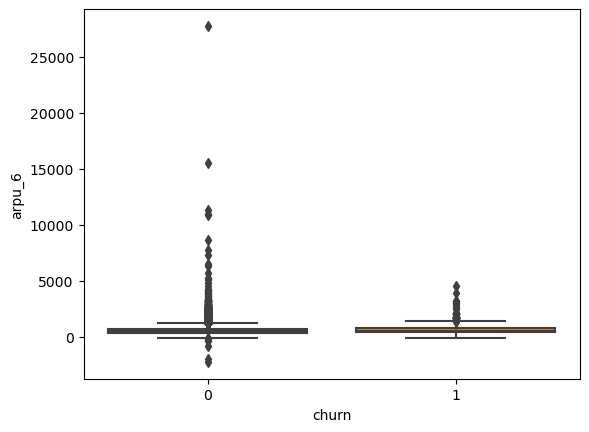

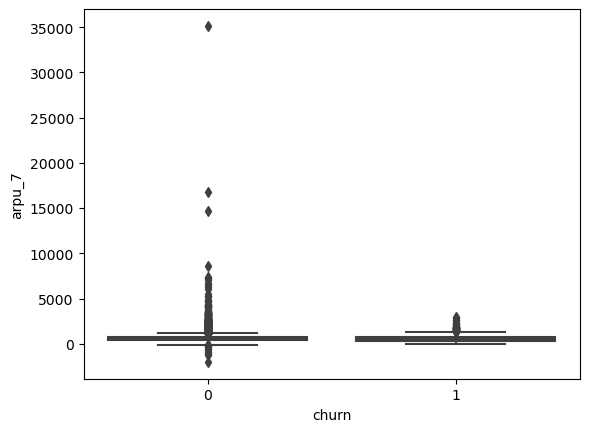

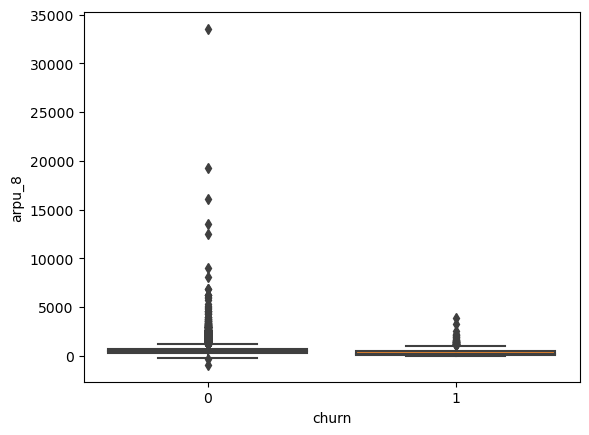

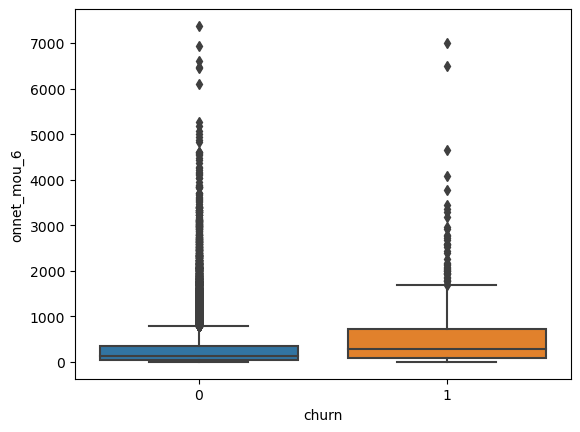

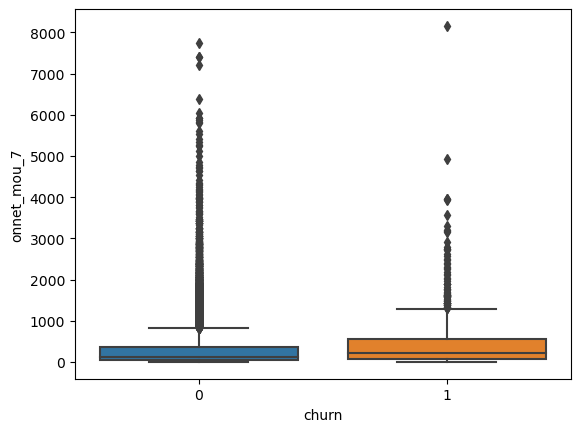

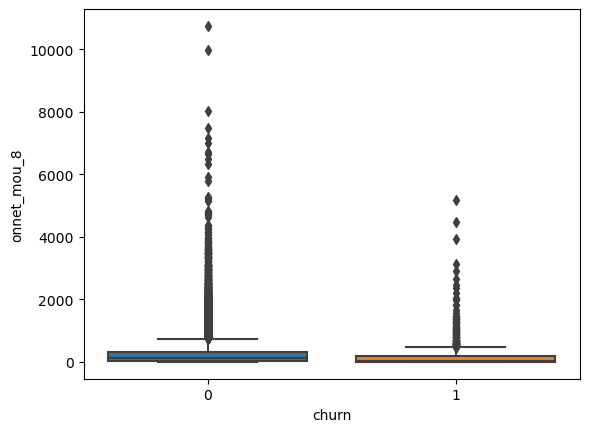

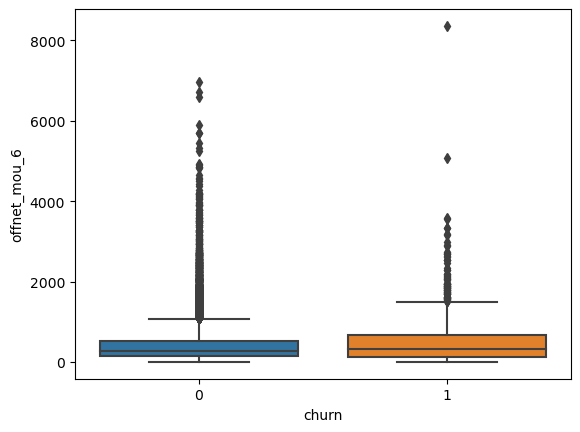

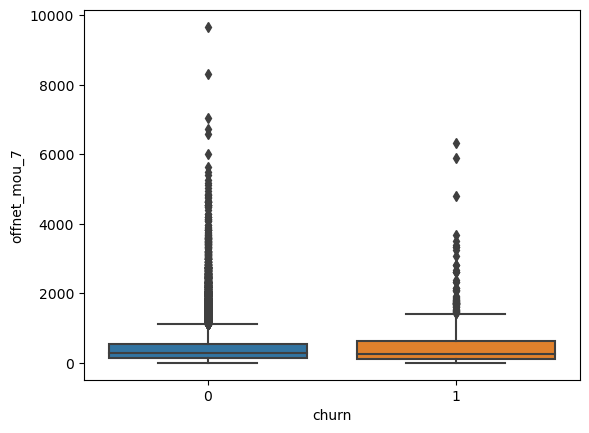

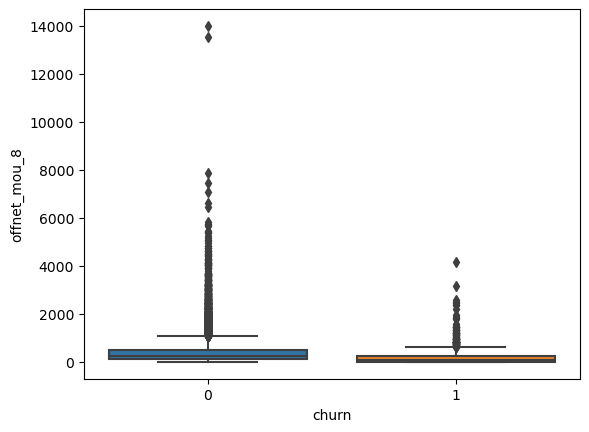

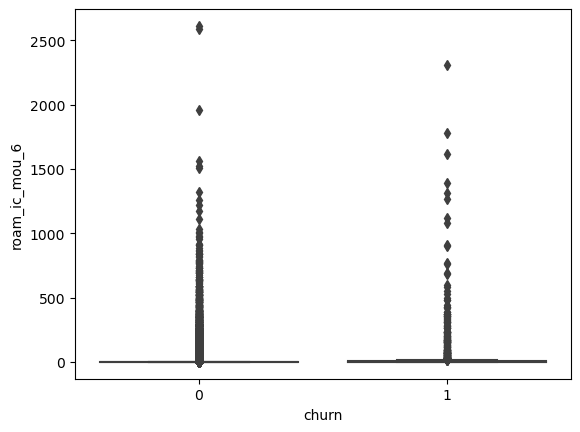

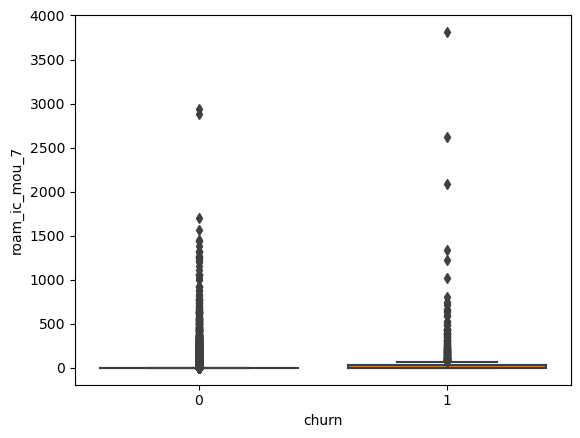

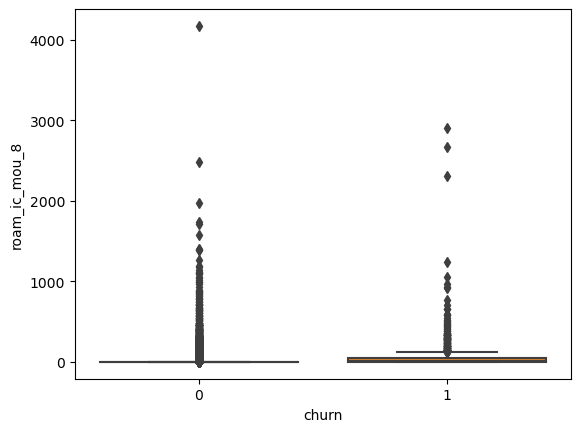

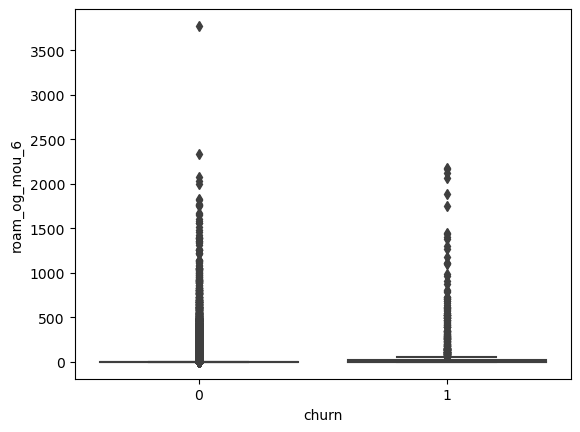

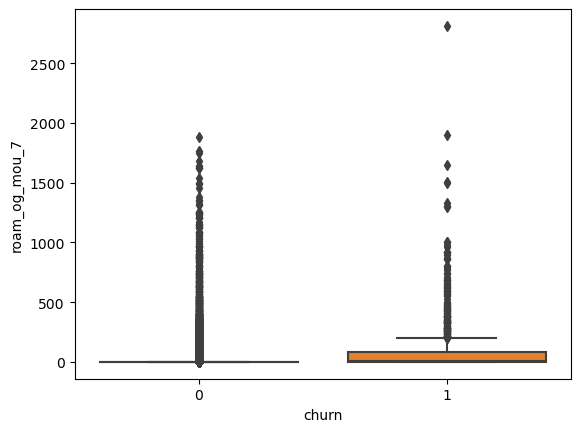

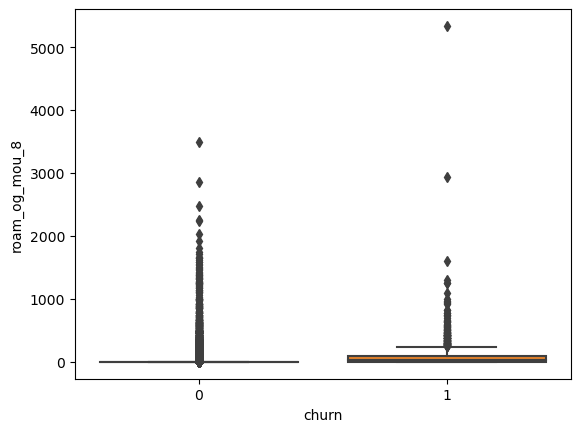

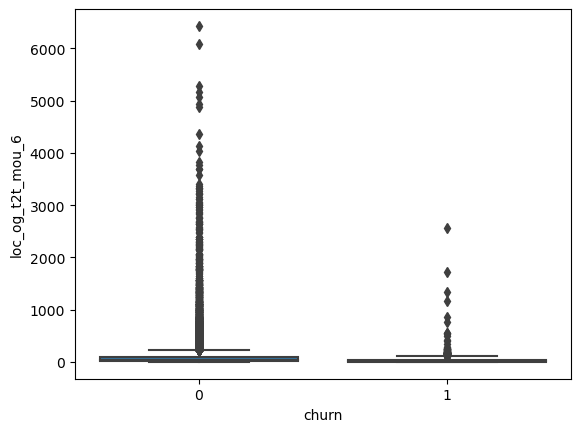

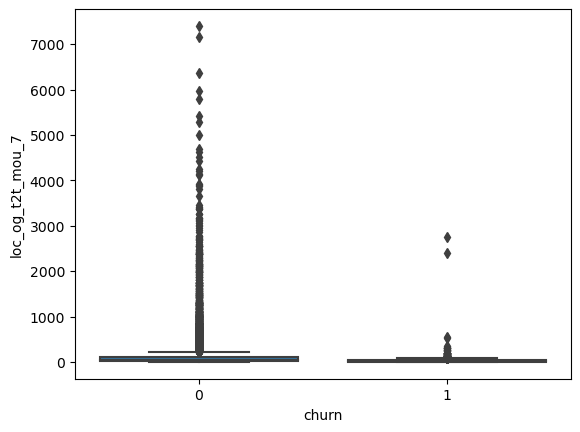

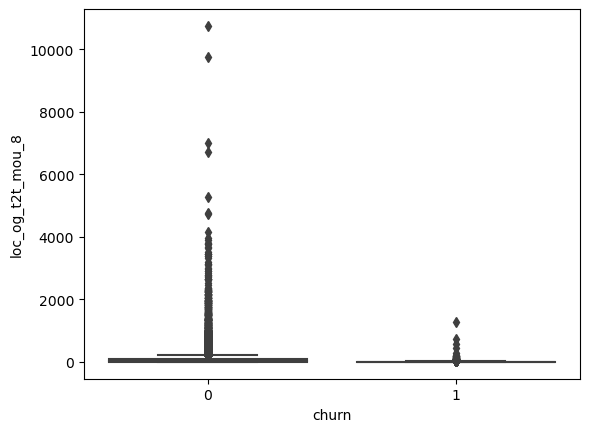

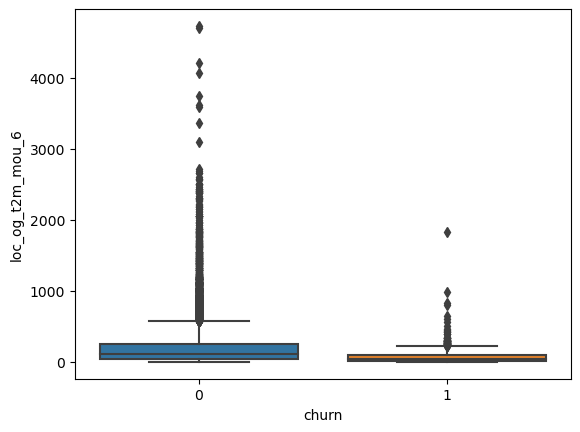

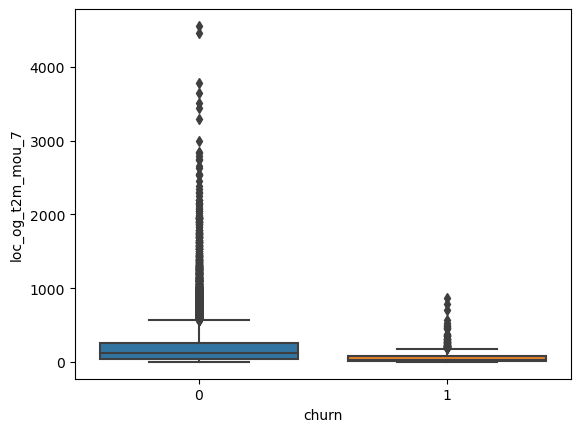

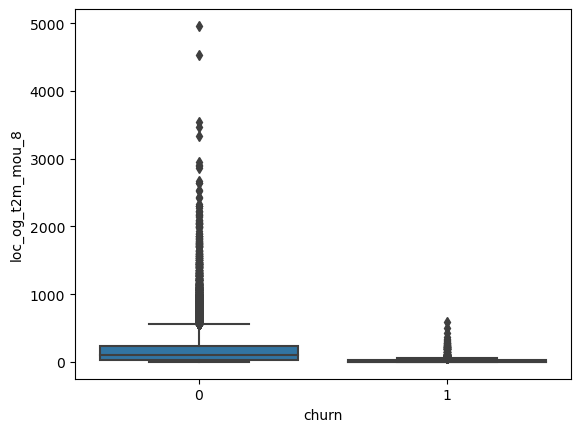

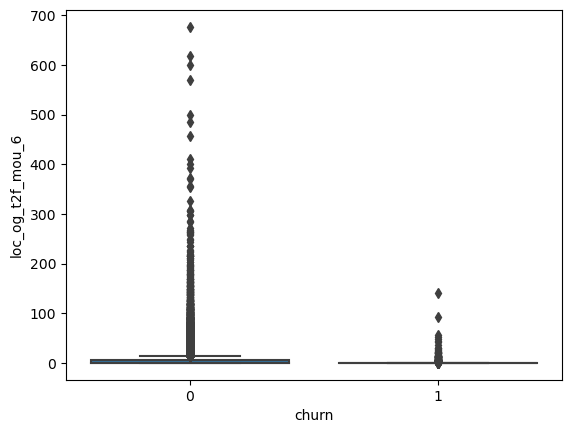

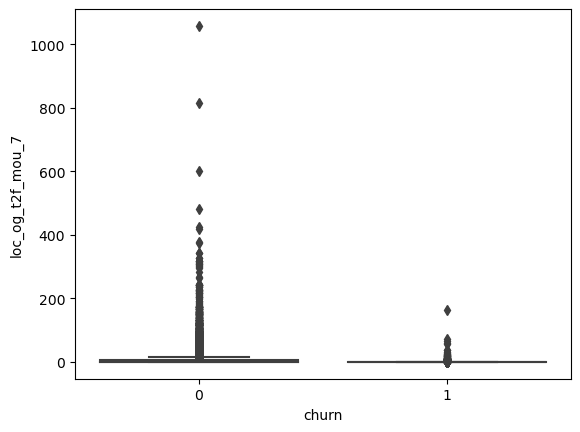

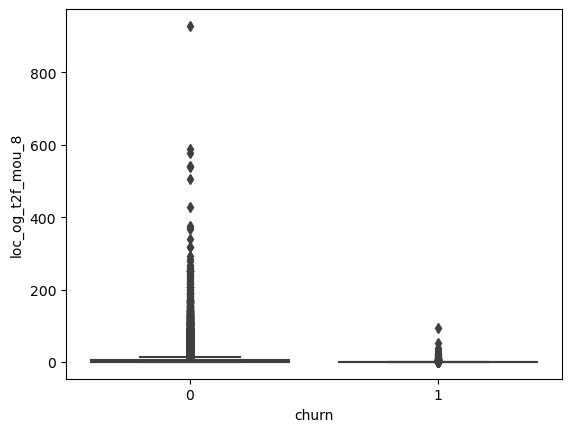

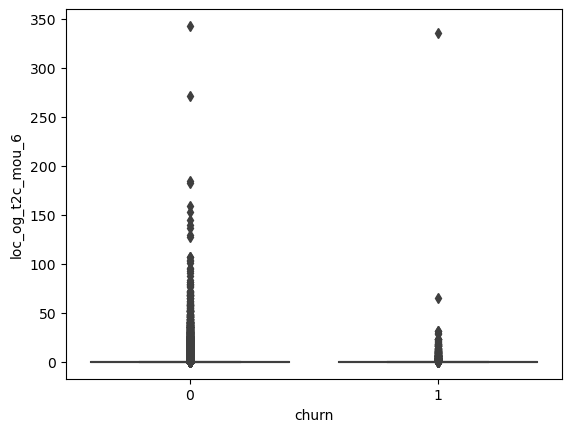

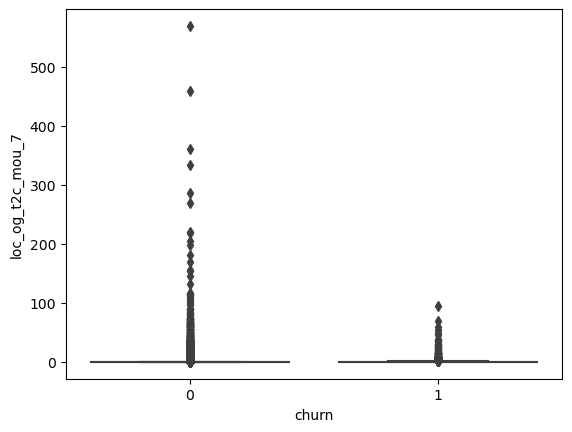

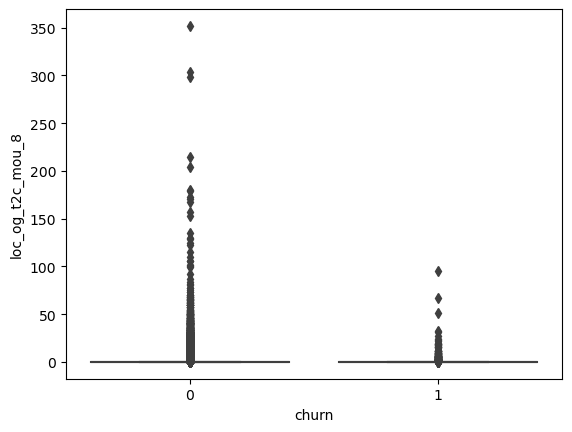

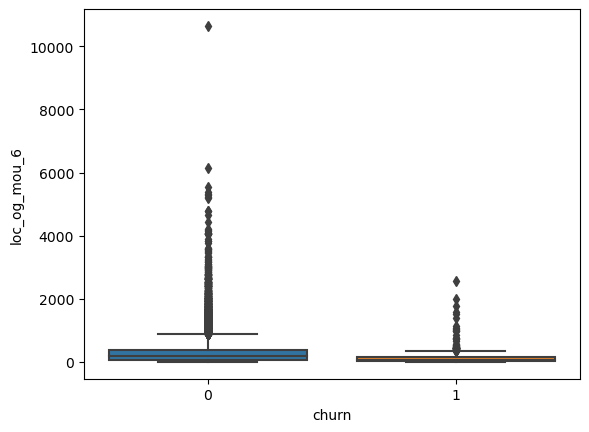

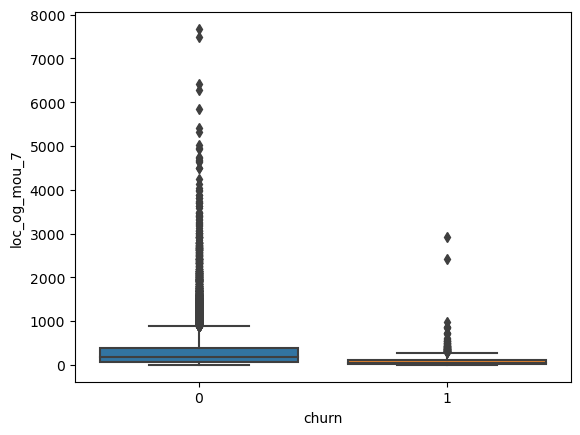

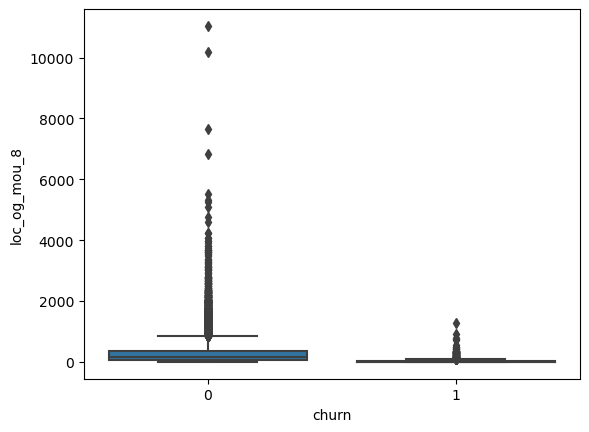

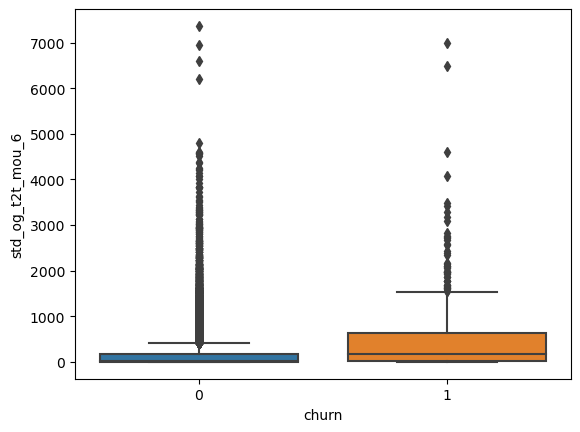

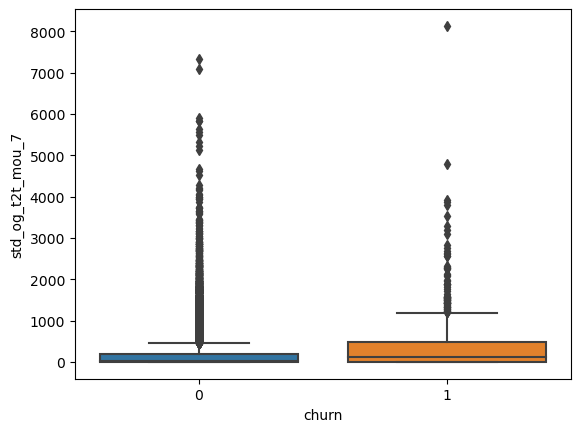

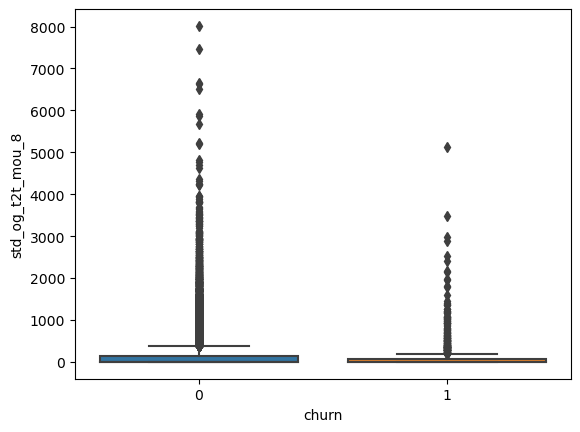

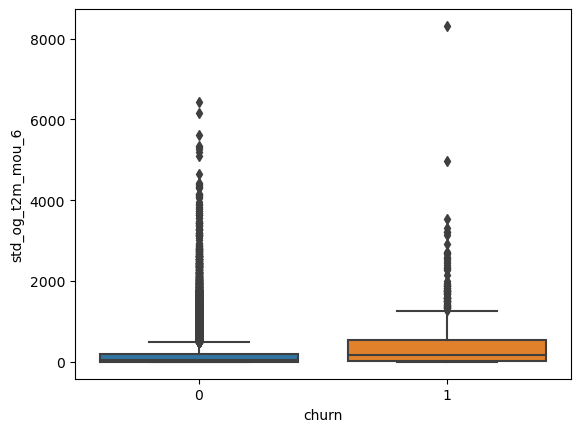

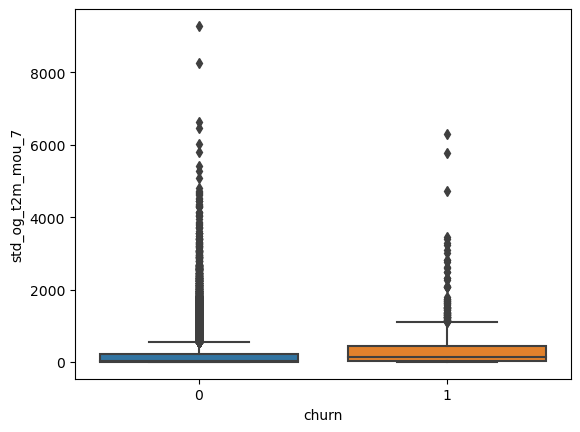

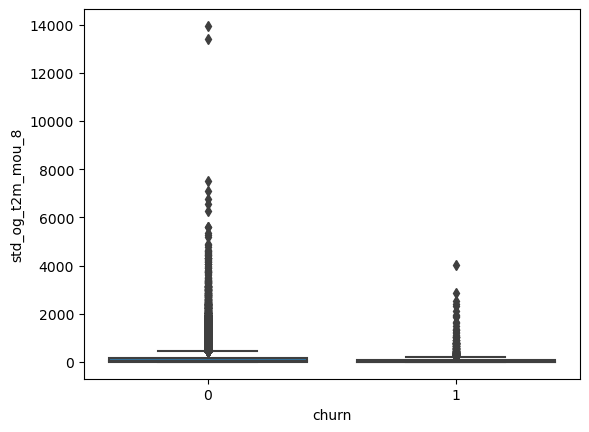

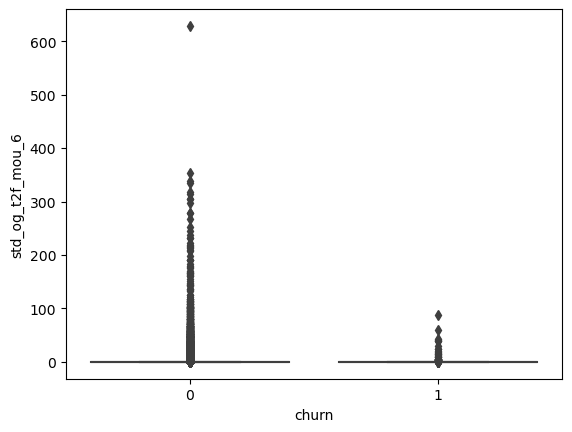

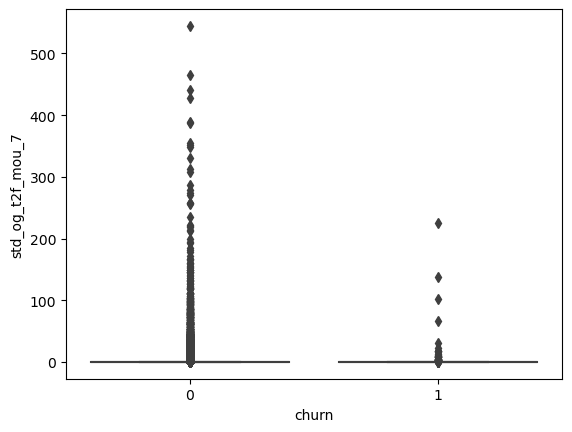

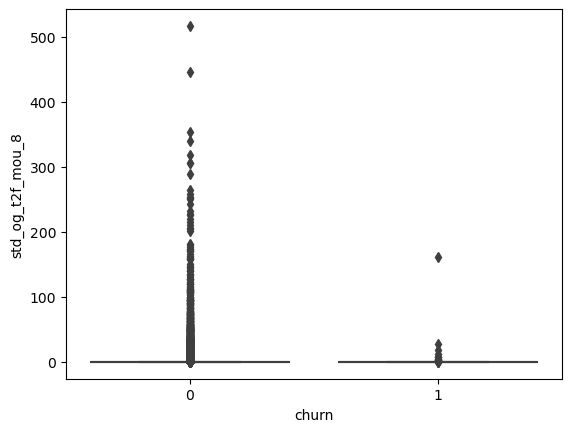

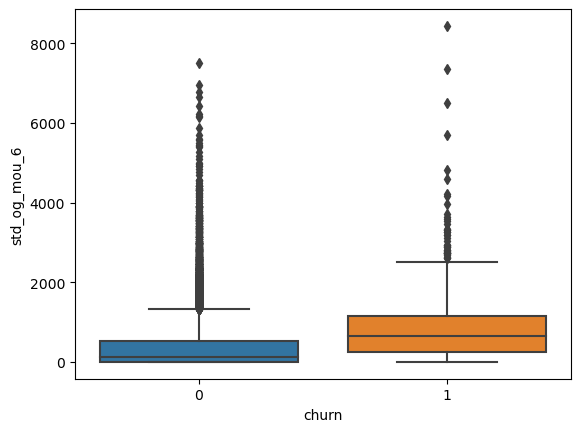

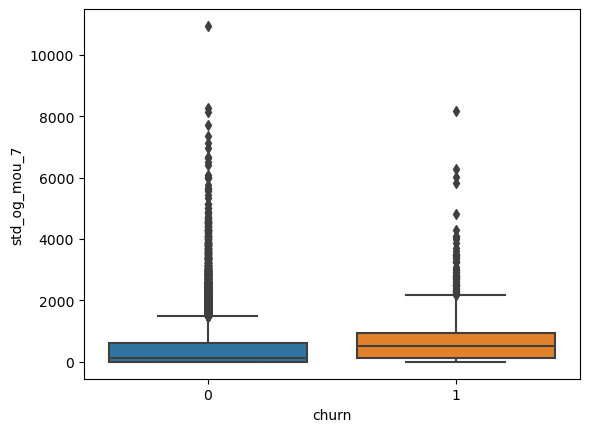

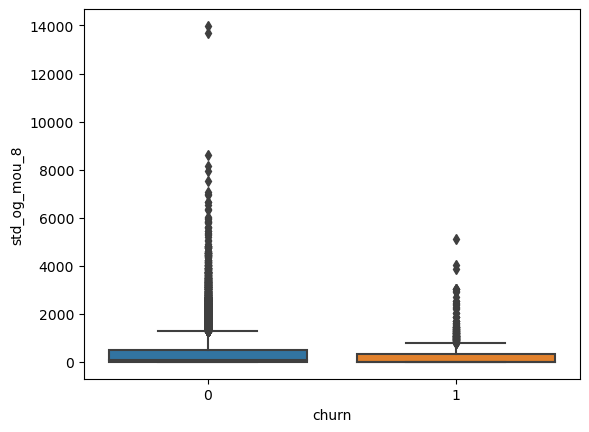

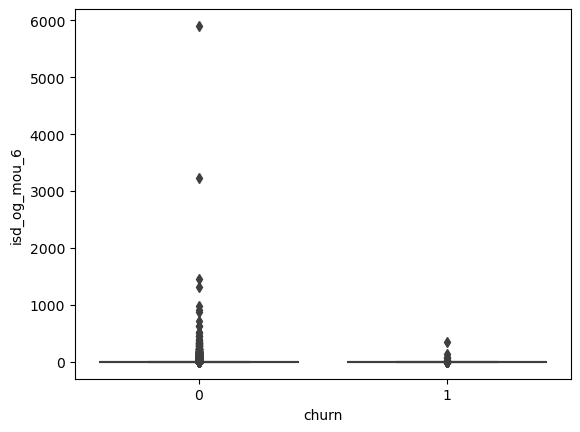

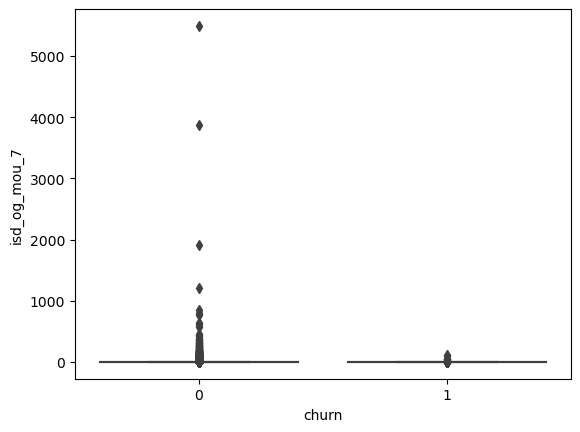

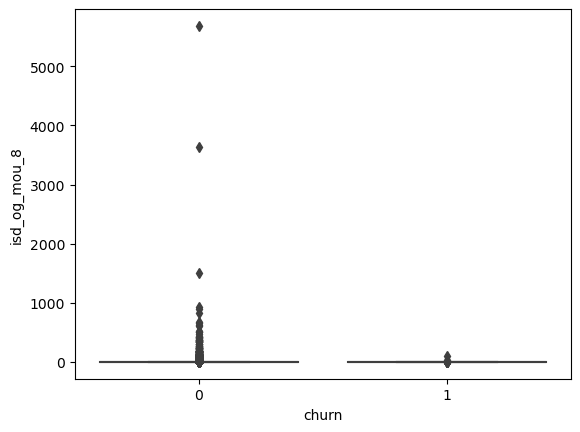

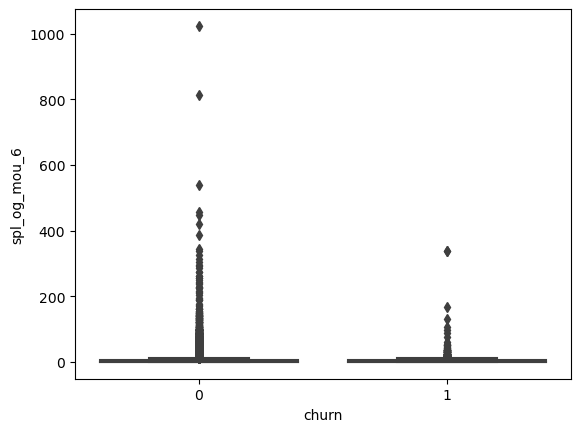

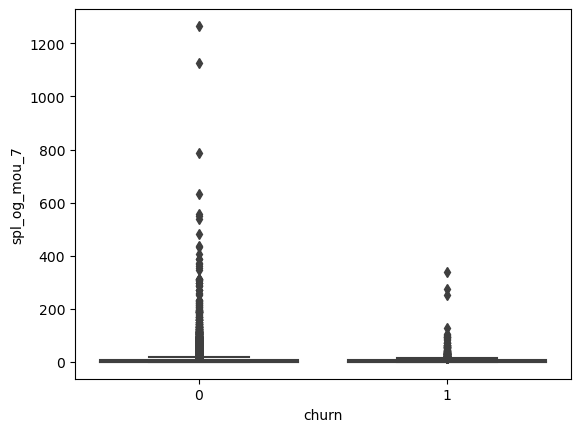

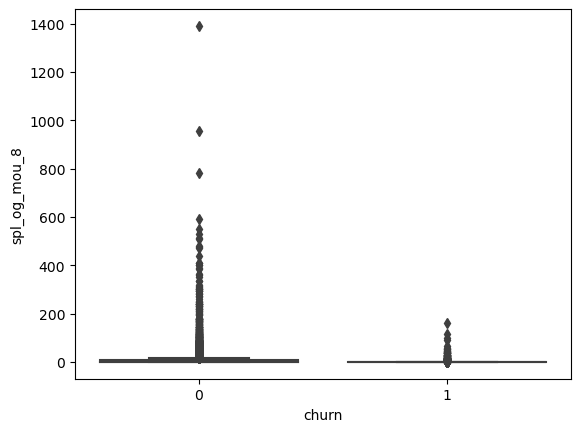

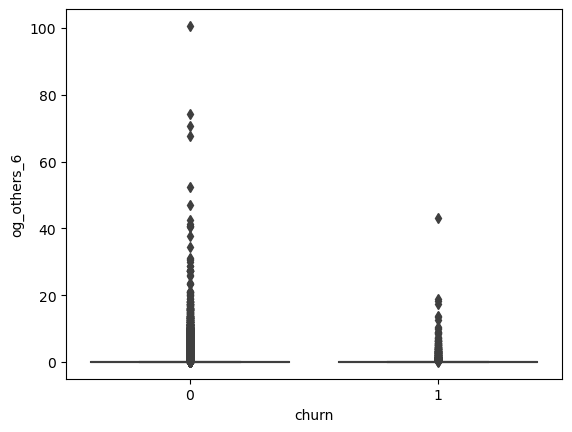

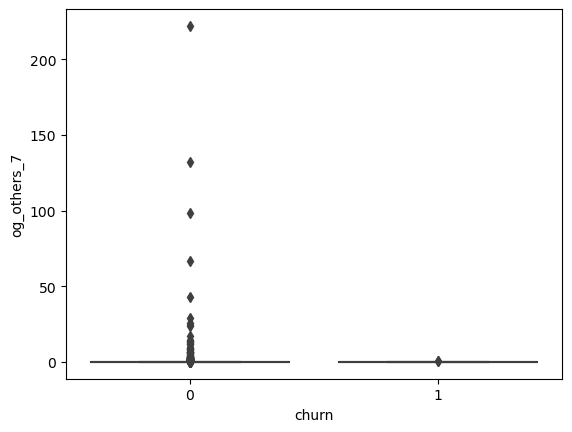

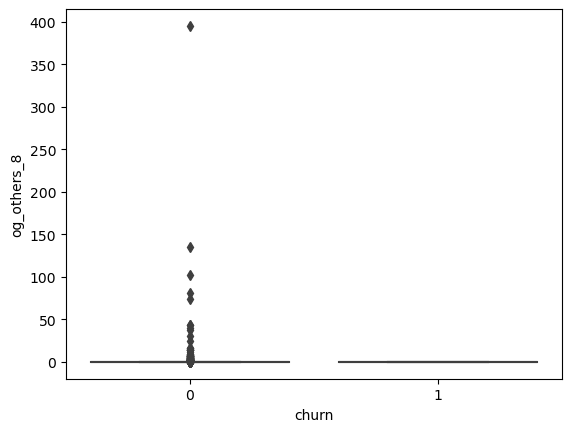

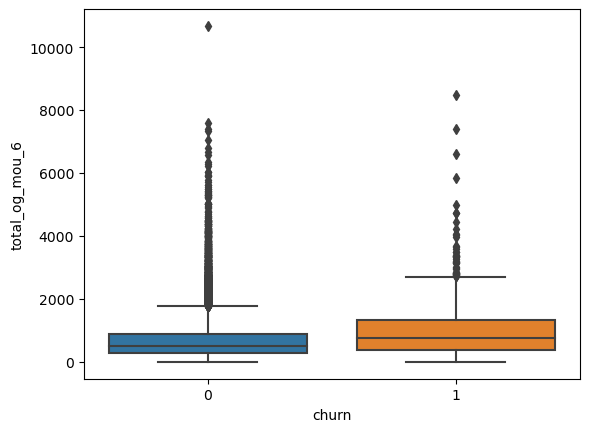

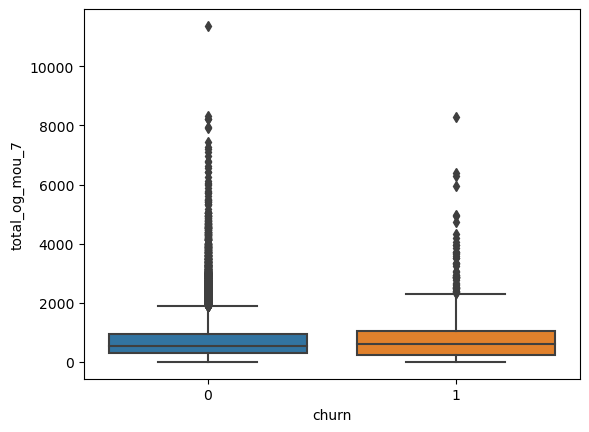

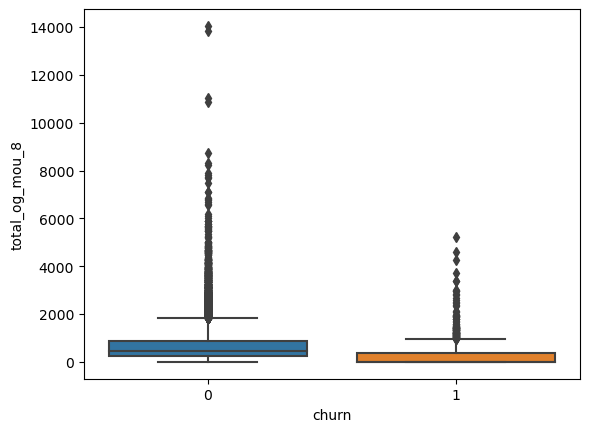

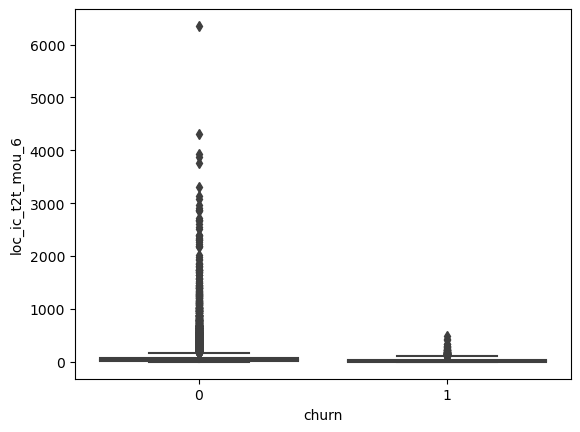

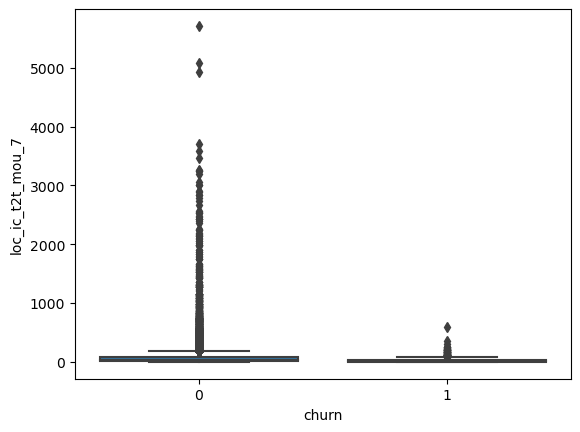

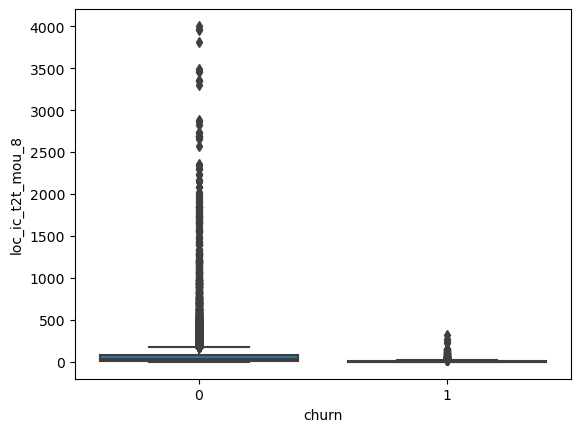

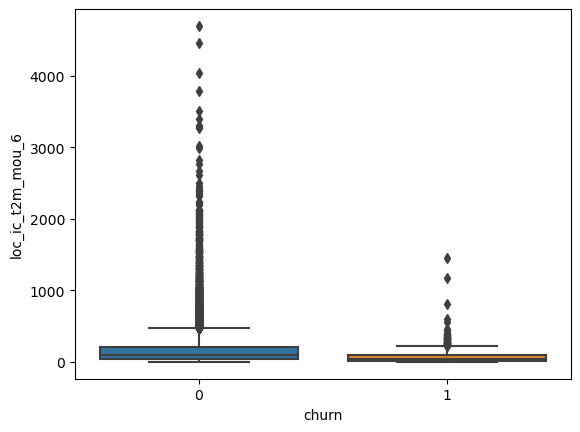

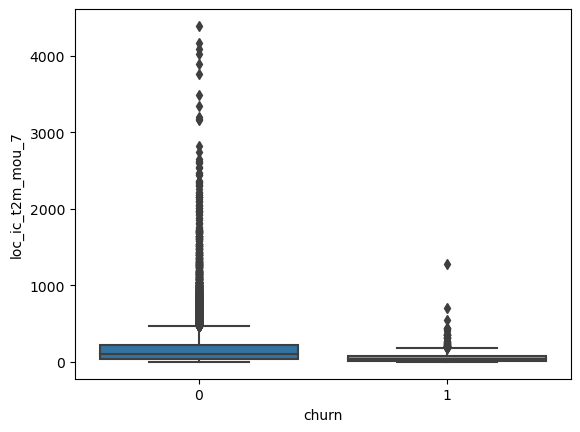

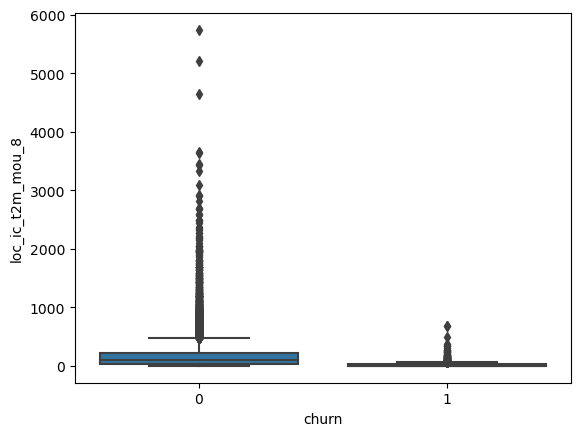

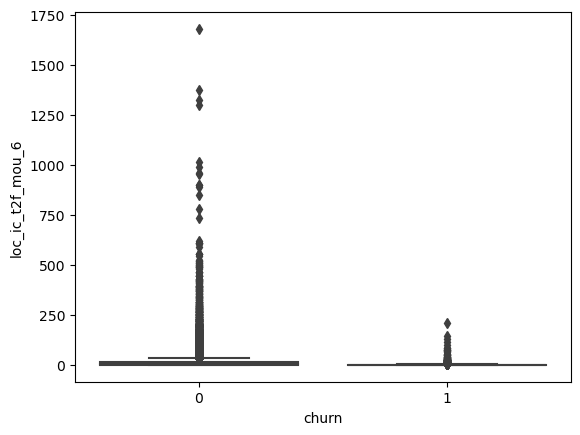

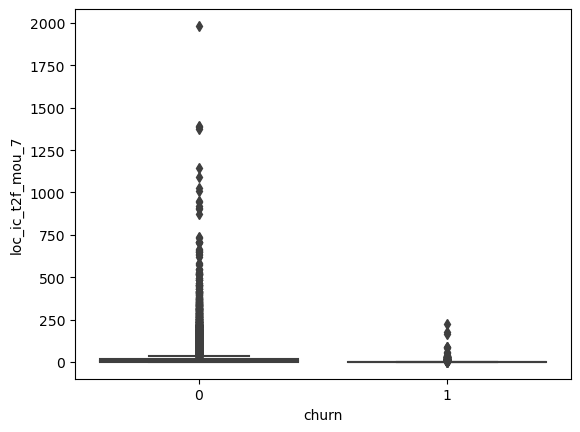

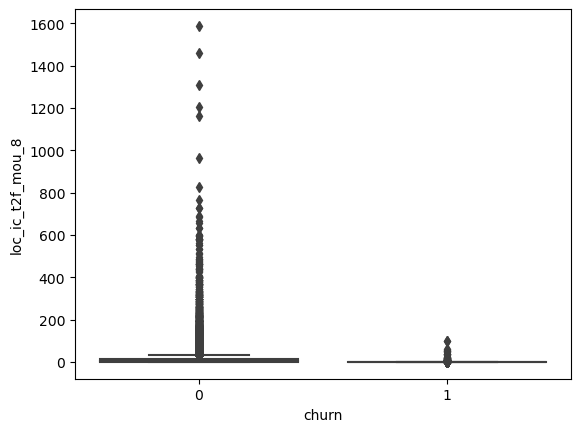

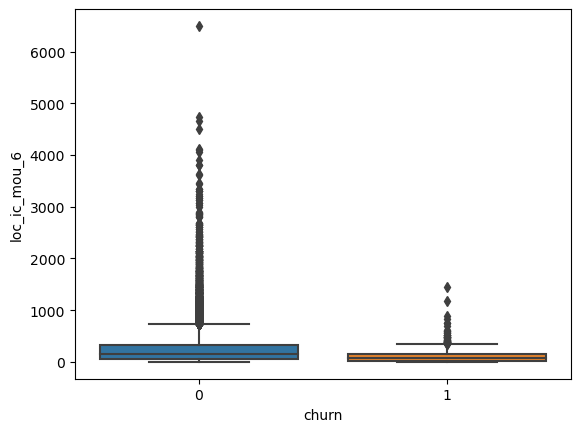

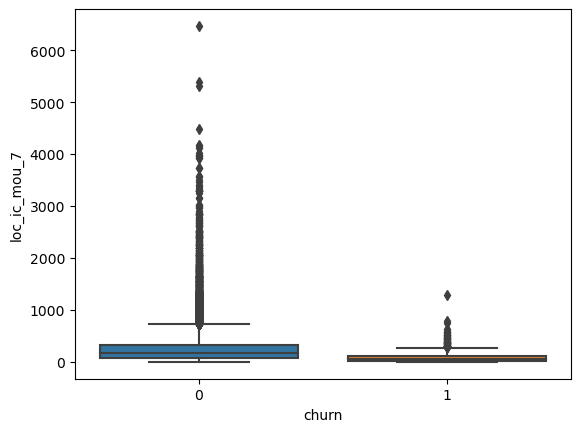

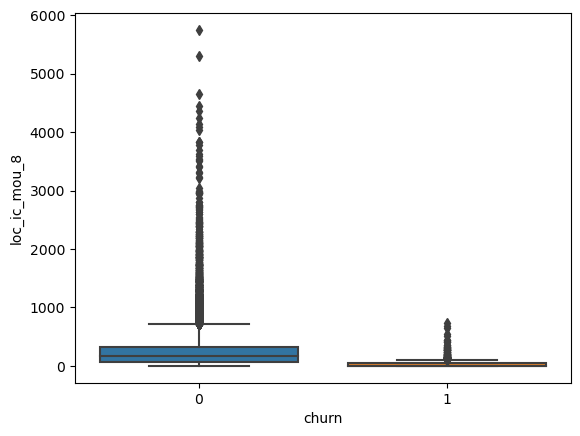

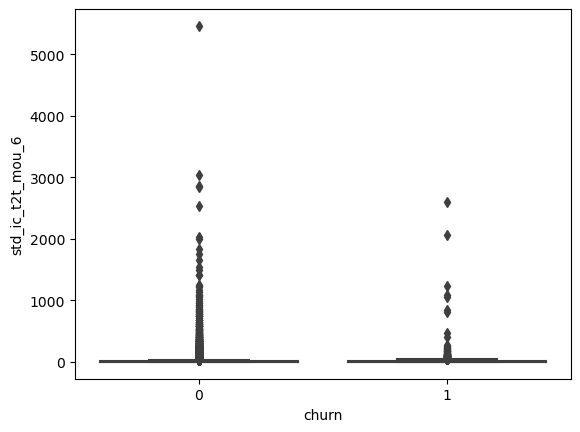

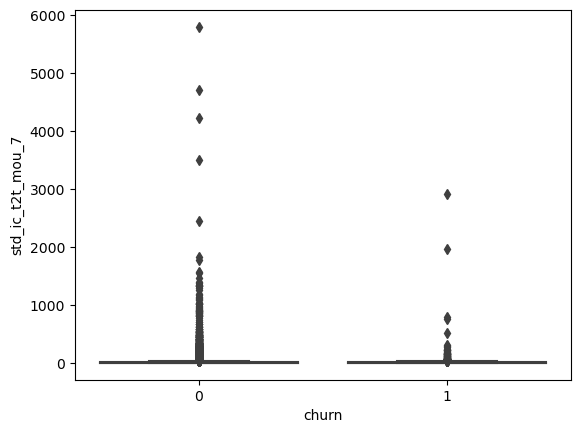

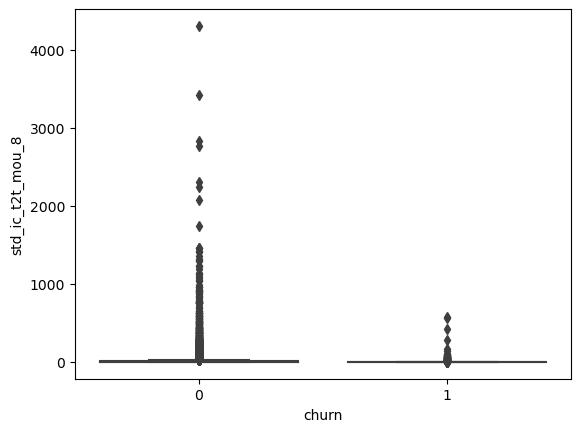

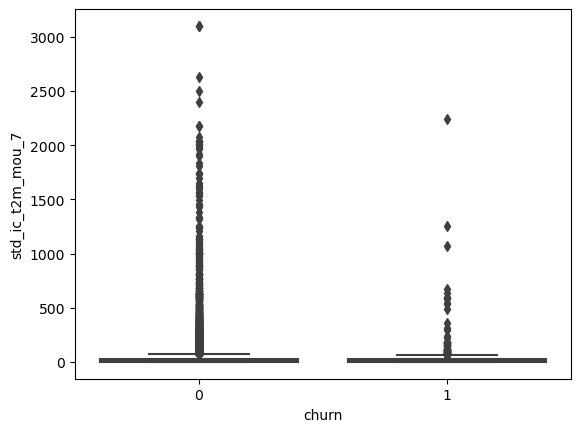

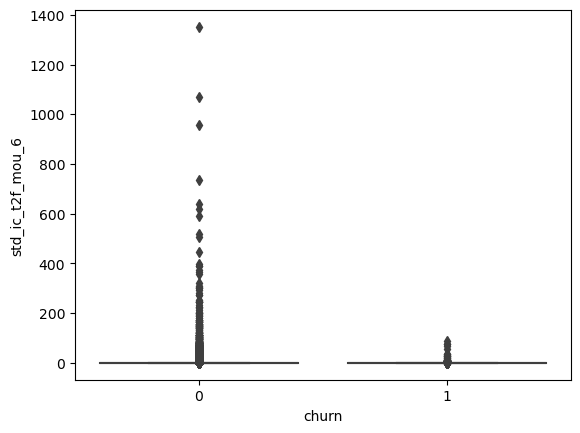

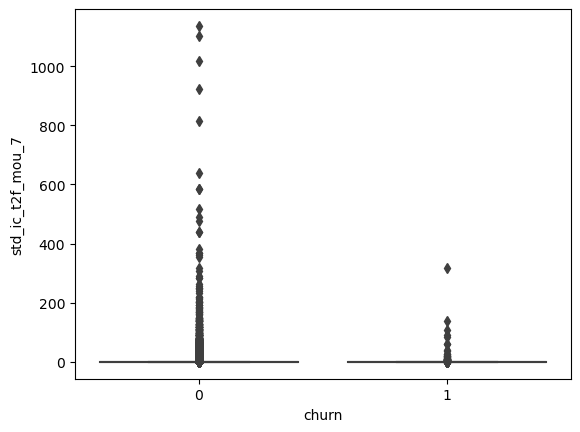

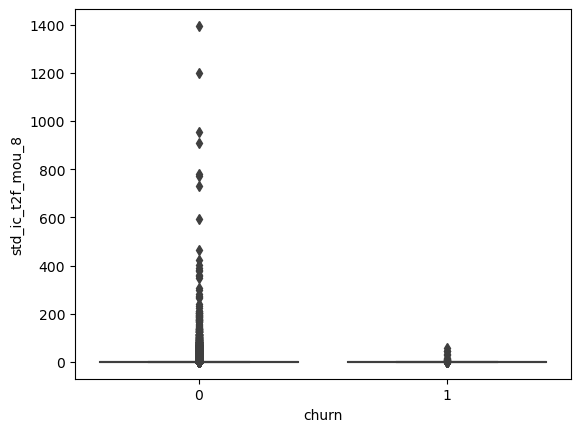

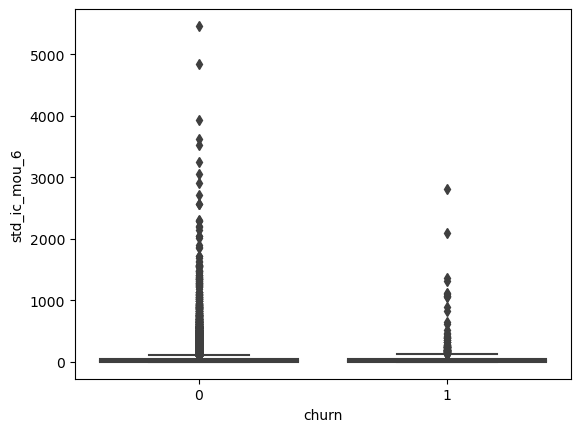

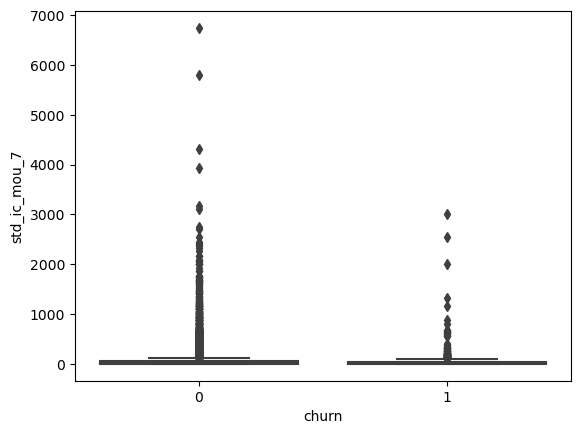

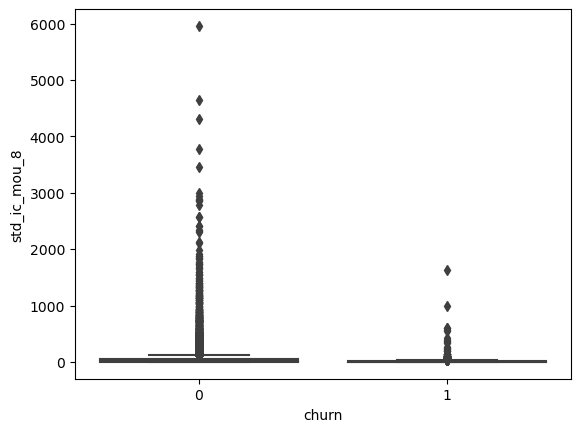

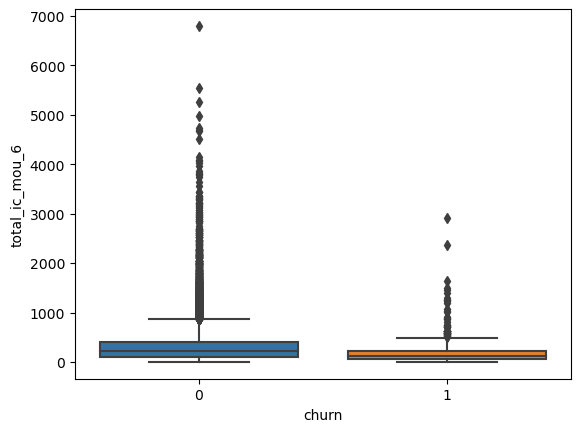

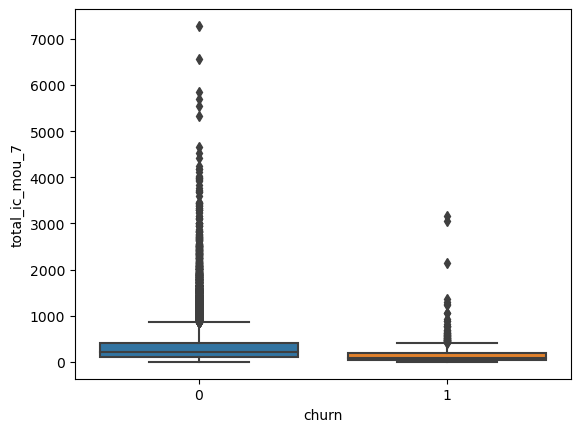

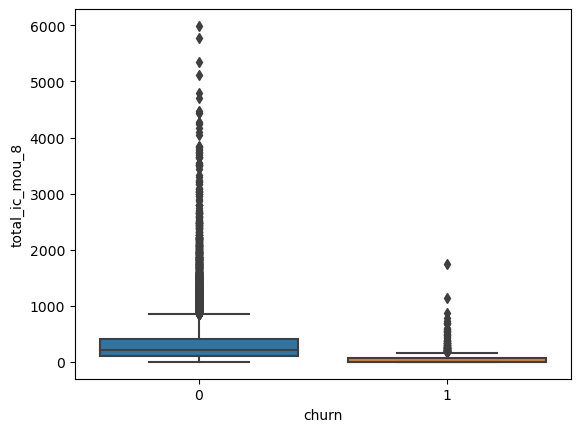

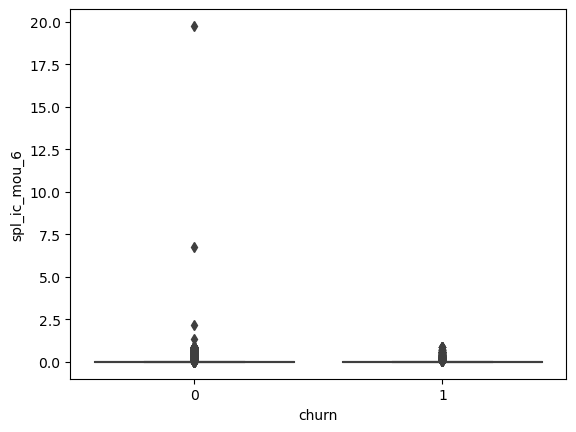

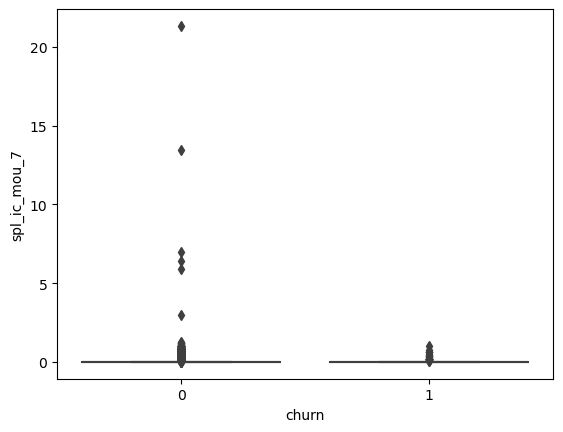

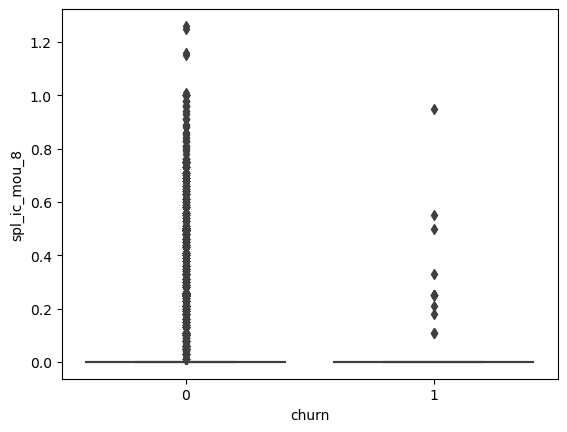

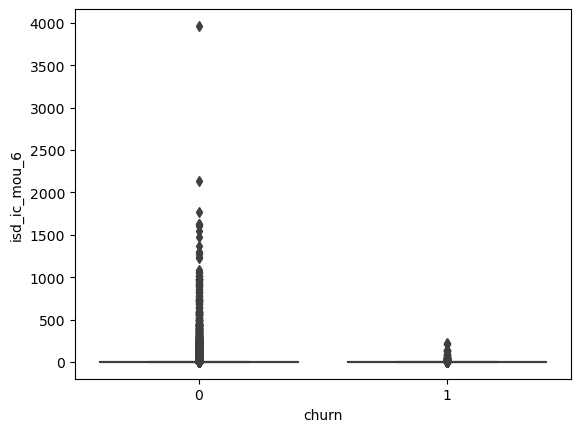

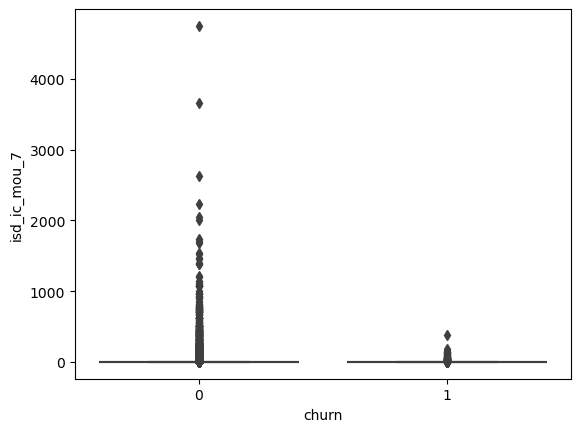

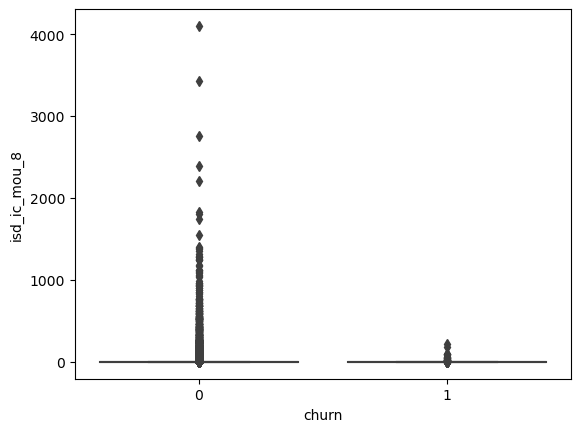

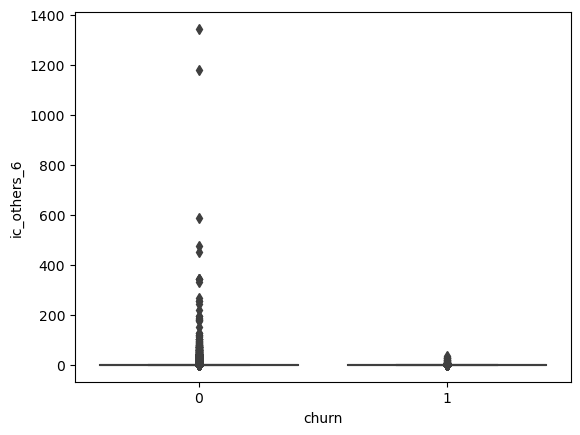

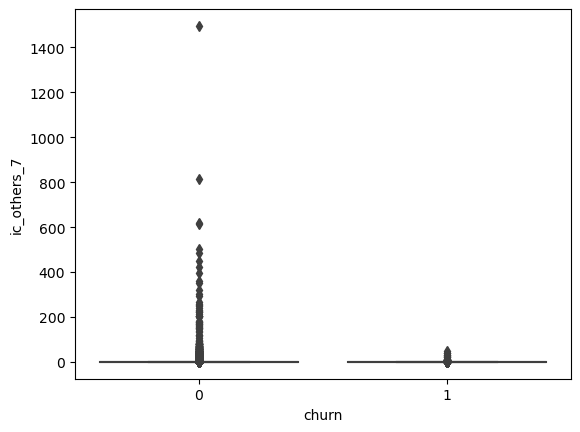

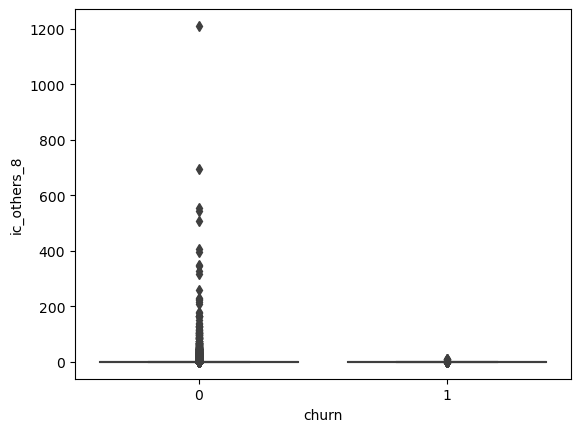

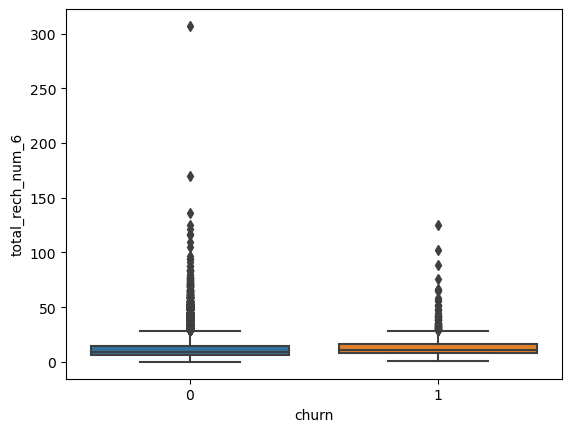

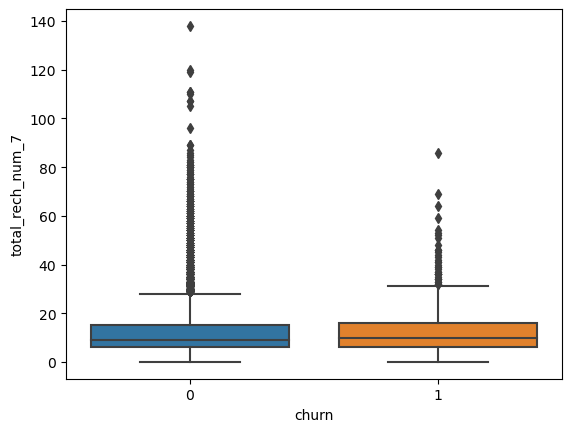

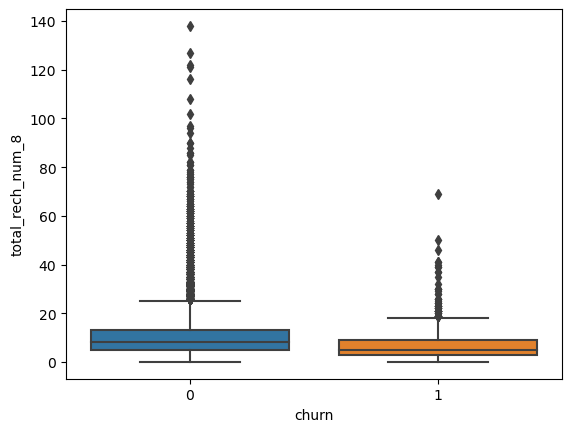

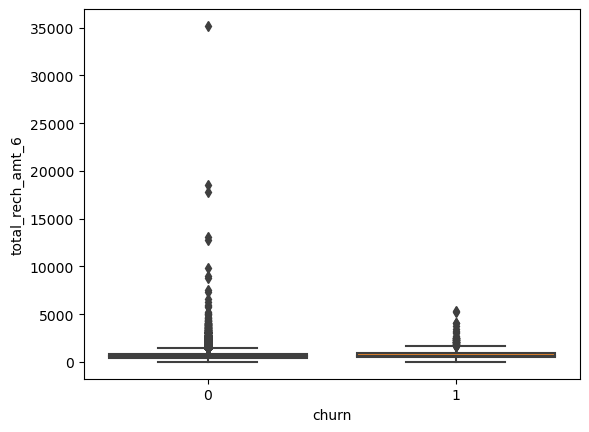

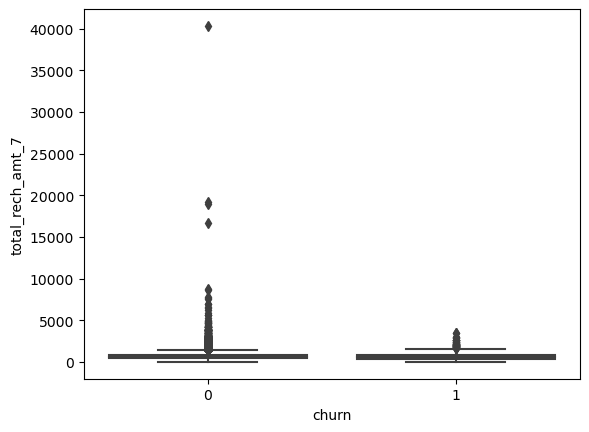

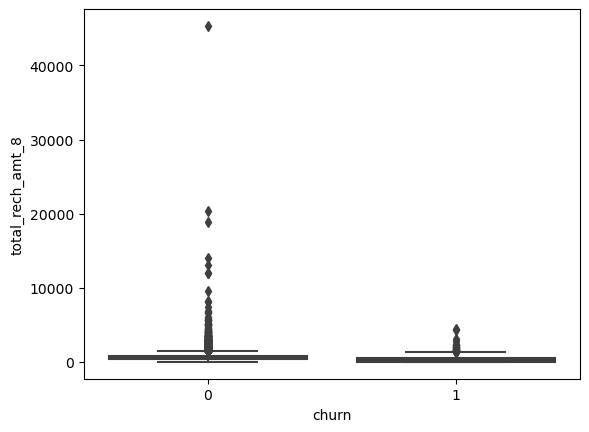

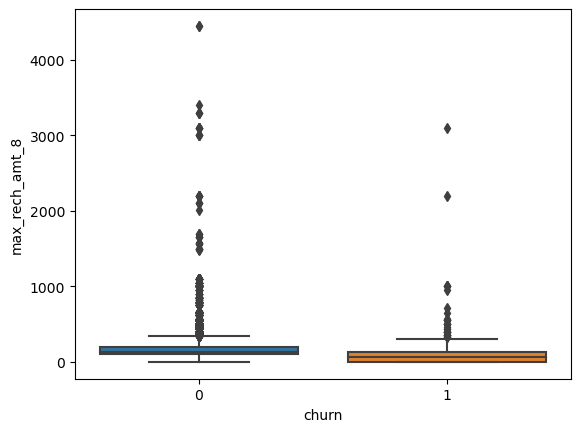

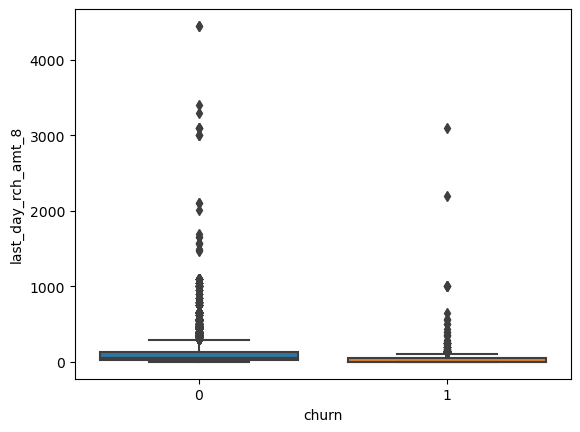

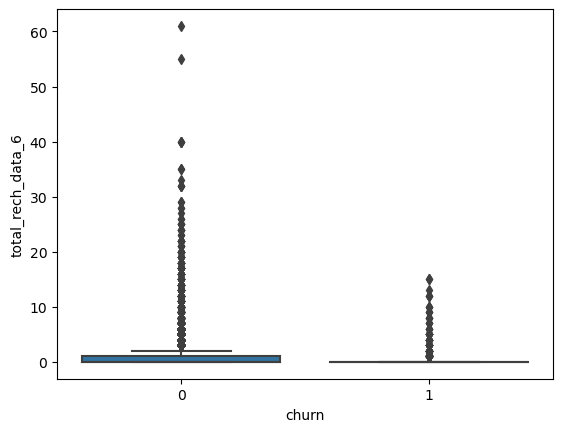

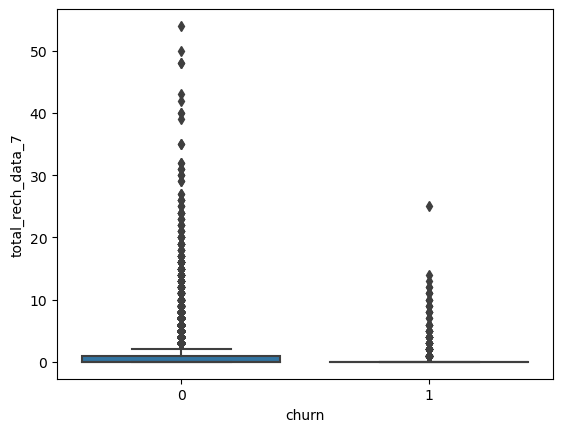

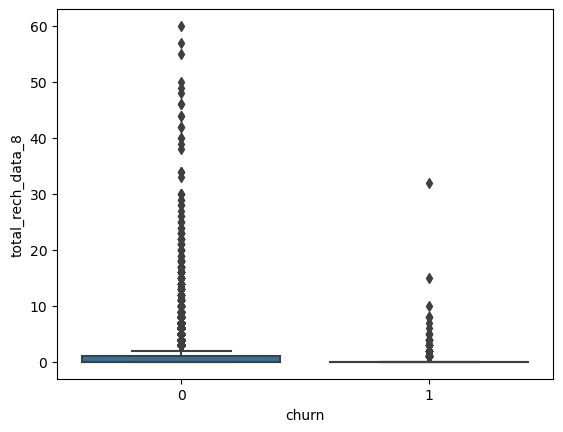

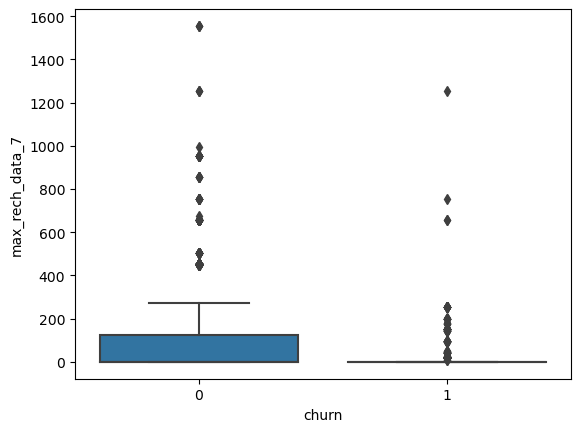

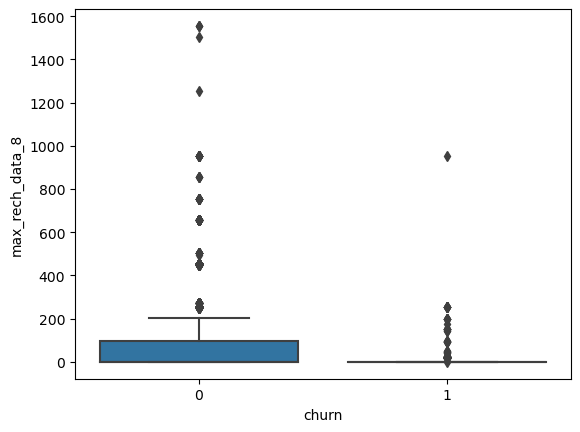

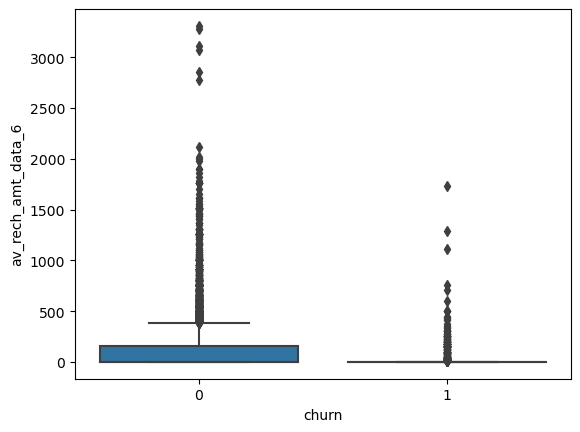

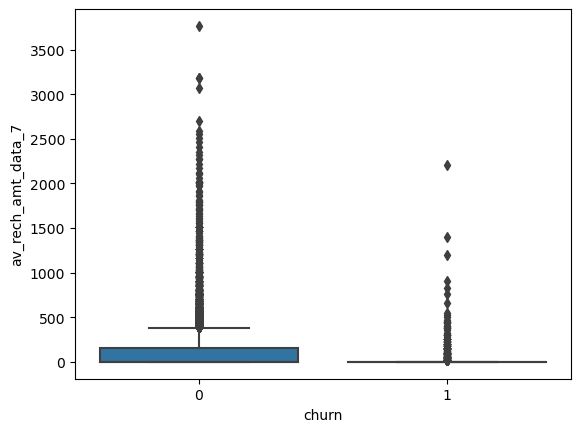

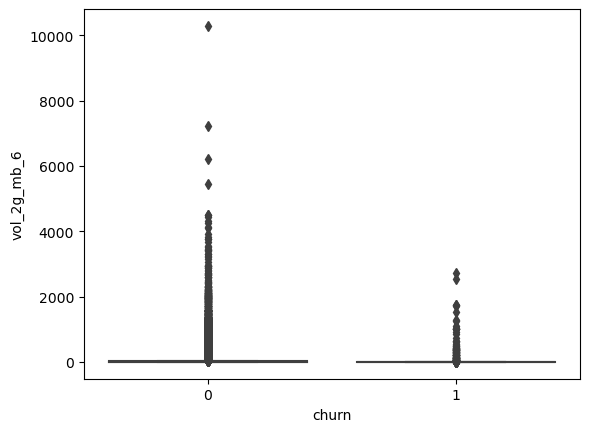

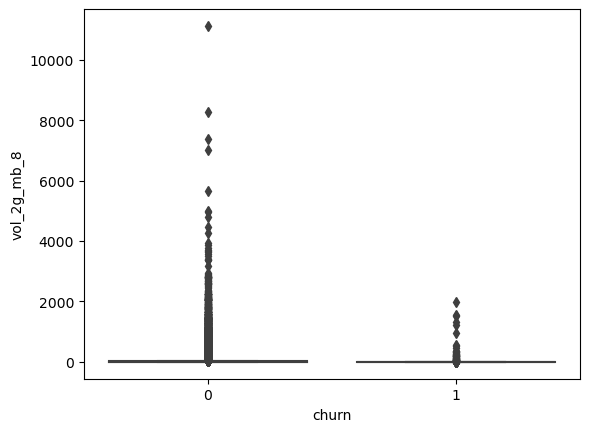

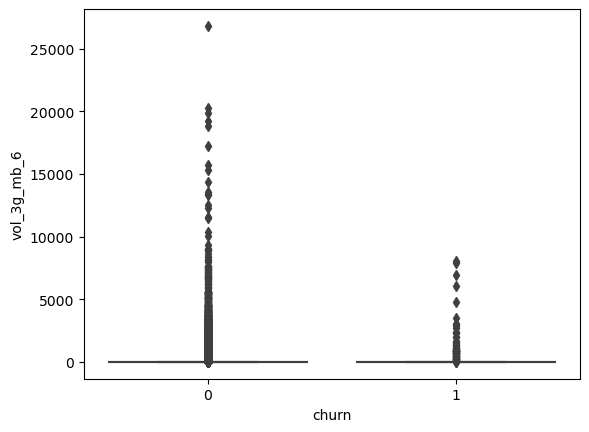

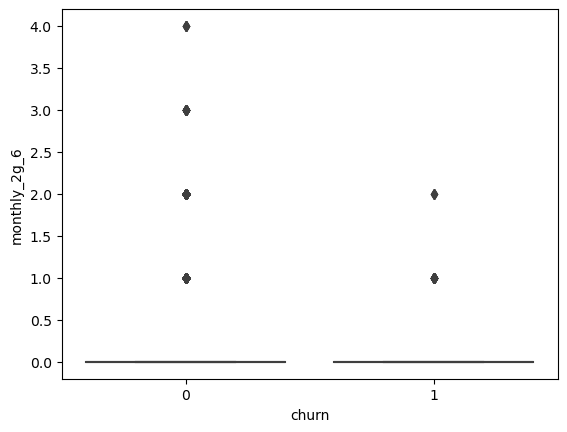

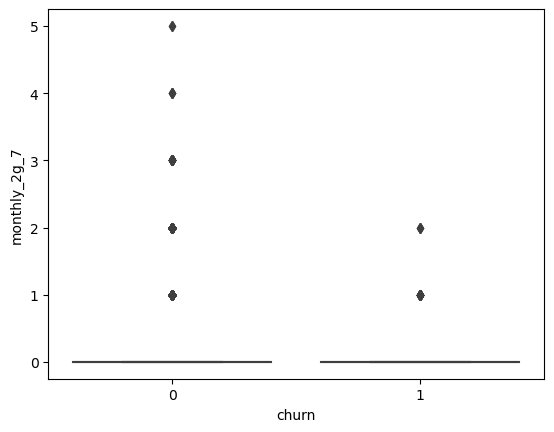

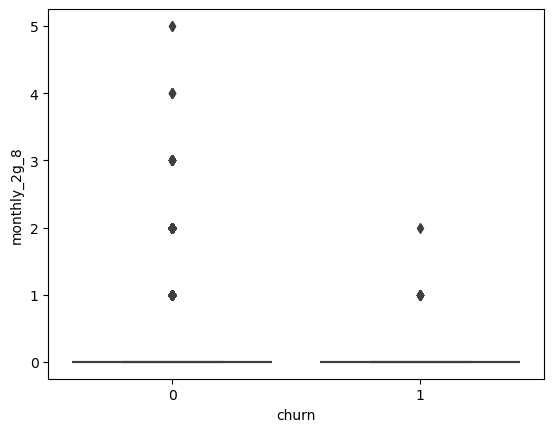

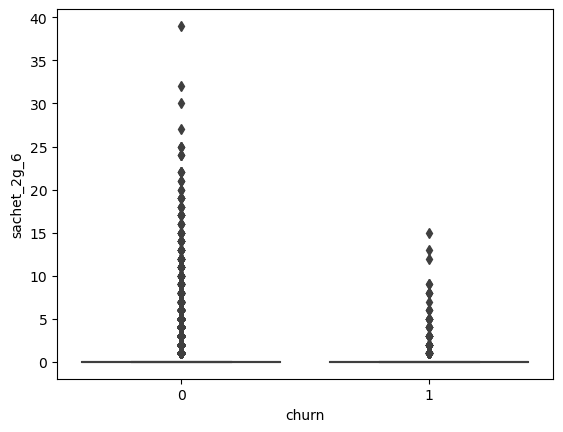

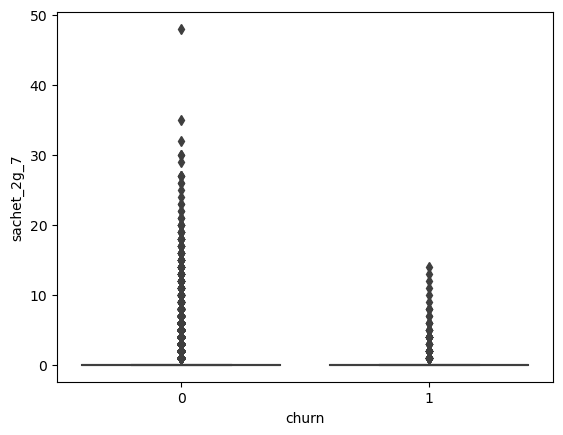

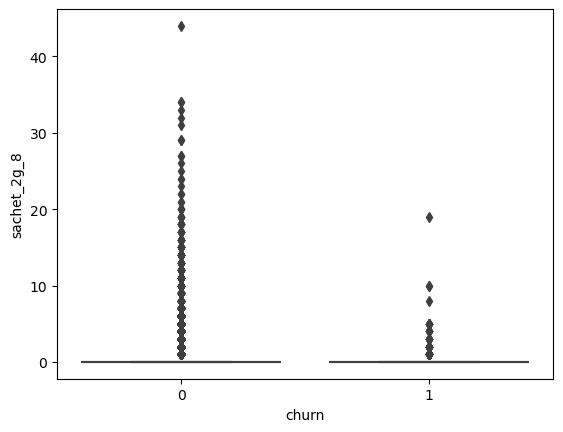

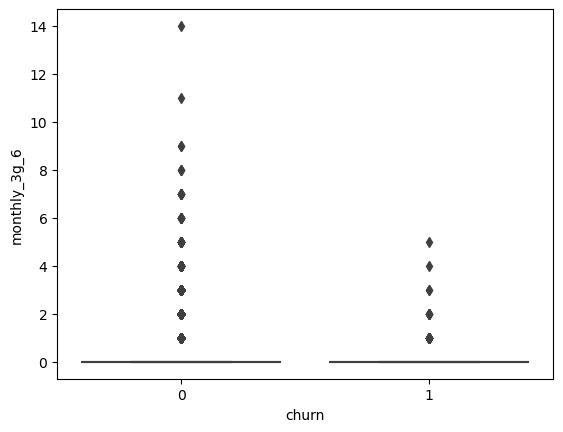

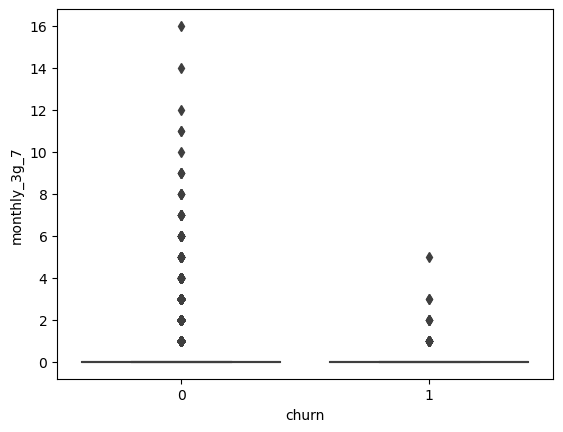

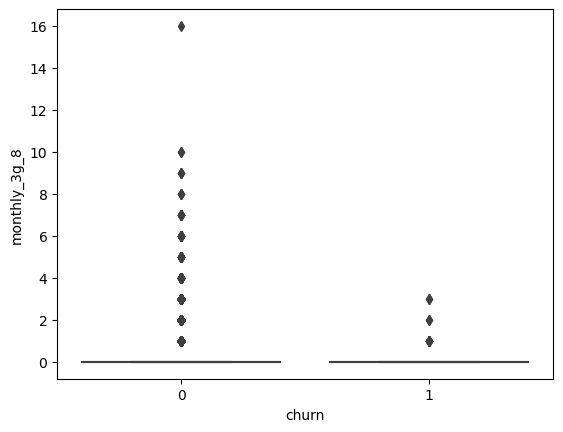

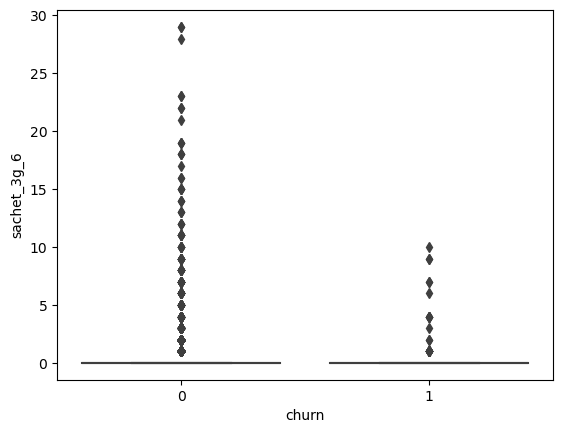

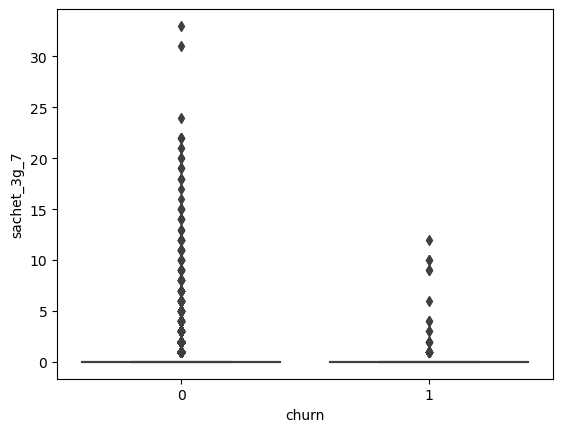

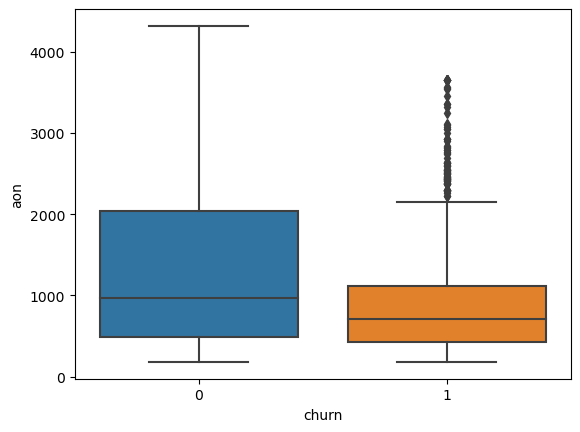

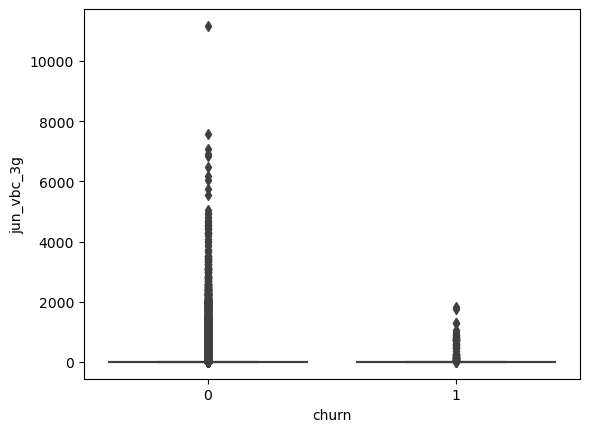

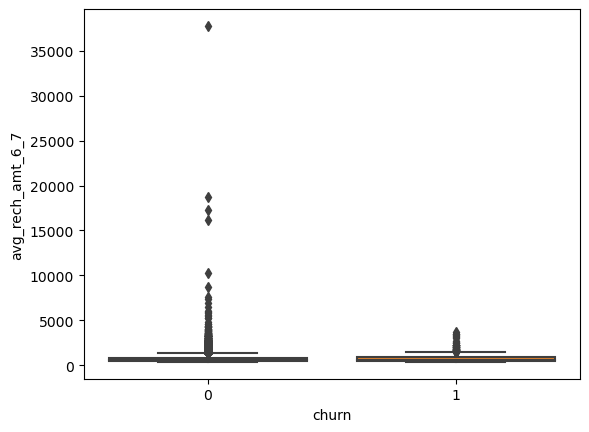

In [55]:
for i in numeric_cols:
    plt.figure
    sns.boxplot(x=tele_data_filtered.churn,y=tele_data_filtered[i] )
    plt.show()

As we can notice that there are lot of outliers in the data. We need to handle it

In [56]:
# Removing outliers below 10th and above 90th percentile
for col in numeric_cols: 
    q1 = df[col].quantile(0.10)
    q3 = df[col].quantile(0.90)
    iqr = q3-q1
    range_low  = q1-1.5*iqr
    range_high = q3+1.5*iqr
    # Assigning the filtered dataset into data
    data = df.loc[(df[col] > range_low) & (df[col] < range_high)]

data.shape

(27705, 136)

### Derive new features

In [57]:
# List the columns of total mou, rech_num and rech_amt
[total for total in df.columns.to_list() if 'total' in total]

['total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'total_ic_mou_6',
 'total_ic_mou_7',
 'total_ic_mou_8',
 'total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8']

#### Deriving new column `decrease_mou_action`
This column indicates whether the minutes of usage of the customer has decreased in the action phase than the good phase.

In [58]:
# Total mou at good phase incoming and outgoing
df['total_mou_good'] = (df['total_og_mou_6'] + df['total_ic_mou_6'])

In [59]:
# Avg. mou at action phase
# We are taking average because there are two months(7 and 8) in action phase
df['avg_mou_action'] = (df['total_og_mou_7'] + df['total_og_mou_8'] + df['total_ic_mou_7'] + df['total_ic_mou_8'])/2

In [60]:
# Difference avg_mou_good and avg_mou_action
df['diff_mou'] = df['avg_mou_action'] - df['total_mou_good']

In [61]:
# Checking whether the mou has decreased in action phase
df['decrease_mou_action'] = np.where((df['diff_mou'] < 0), 1, 0)

In [62]:
df.head()

mobile_number   arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  \
8     7001524846  378.721  492.223  137.362       413.69       351.03   
13    7002191713  492.846  205.671  593.260       501.76       108.39   
16    7000875565  430.975  299.869  187.894        50.51        74.01   
17    7000187447  690.008   18.980   25.499      1185.91         9.28   
21    7002124215  514.453  597.753  637.760       102.41       132.11   

    onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
8         35.08         94.66         80.63        136.48           0.00   
13       534.24        413.31        119.28        482.46          23.53   
16        70.61        296.29        229.74        162.76           0.00   
17         7.79         61.64          0.00          5.54           0.00   
21        85.14        757.93        896.68        983.39           0.00   

    roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
8            0.00           0.00           0.00           0.00           0.00   
13         144.24          72.11           7.98          35.26           1.44   
16           2.83           0.00           0.00          17.74           0.00   
17           4.76           4.81           0.00           8.46          13.34   
21           0.00           0.00           0.00           0.00           0.00   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
8             297.13            217.59             12.49             80.96   
13             49.63              6.19             36.01            151.13   
16             42.61             65.16             67.38            273.29   
17             38.99              0.00              0.00             58.54   
21              4.48              6.16             23.34             91.81   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
8              70.58             50.54              0.00              0.00   
13             47.28            294.46              4.54              0.00   
16            145.99            128.28              0.00              4.48   
17              0.00              0.00              0.00              0.00   
21             87.93            104.81              0.75              0.00   

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
8               0.00               0.0               0.0              7.15   
13             23.51               0.0               0.0              0.49   
16             10.26               0.0               0.0              0.00   
17              0.00               0.0               0.0              0.00   
21              1.58               0.0               0.0              0.00   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
8         378.09        288.18         63.04            116.56   
13        205.31         53.48        353.99            446.41   
16        315.91        215.64        205.93              7.89   
17         97.54          0.00          0.00           1146.91   
21         97.04         94.09        129.74             97.93   

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
8             133.43             22.58             13.69             10.04   
13             85.98            498.23            255.36             52.94   
16              2.58              3.23             22.99             64.51   
17              0.81              0.00              1.55              0.00   
21            125.94             61.79            665.36            808.74   

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
8              75.69               0.0               0.0               0.0   
13            156.94               0.0               0.0               0.0   
16             18.29               0.0               0.0               0.0   
17              0.00               

#### Deriving new column `decrease_rech_num_action`
This column indicates whether the number of recharge of the customer has decreased in the action phase than the good phase.

In [63]:
# Avg rech number at action phase
df['avg_rech_num_action'] = (df['total_rech_num_7'] + df['total_rech_num_8'])/2

In [64]:
# Difference total_rech_num_6 and avg_rech_action
df['diff_rech_num'] = df['avg_rech_num_action'] - df['total_rech_num_6']

In [65]:
# Checking if rech_num has decreased in action phase
df['decrease_rech_num_action'] = np.where((df['diff_rech_num'] < 0), 1, 0)

In [66]:
df.head()

mobile_number   arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  \
8     7001524846  378.721  492.223  137.362       413.69       351.03   
13    7002191713  492.846  205.671  593.260       501.76       108.39   
16    7000875565  430.975  299.869  187.894        50.51        74.01   
17    7000187447  690.008   18.980   25.499      1185.91         9.28   
21    7002124215  514.453  597.753  637.760       102.41       132.11   

    onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
8         35.08         94.66         80.63        136.48           0.00   
13       534.24        413.31        119.28        482.46          23.53   
16        70.61        296.29        229.74        162.76           0.00   
17         7.79         61.64          0.00          5.54           0.00   
21        85.14        757.93        896.68        983.39           0.00   

    roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
8            0.00           0.00           0.00           0.00           0.00   
13         144.24          72.11           7.98          35.26           1.44   
16           2.83           0.00           0.00          17.74           0.00   
17           4.76           4.81           0.00           8.46          13.34   
21           0.00           0.00           0.00           0.00           0.00   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
8             297.13            217.59             12.49             80.96   
13             49.63              6.19             36.01            151.13   
16             42.61             65.16             67.38            273.29   
17             38.99              0.00              0.00             58.54   
21              4.48              6.16             23.34             91.81   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
8              70.58             50.54              0.00              0.00   
13             47.28            294.46              4.54              0.00   
16            145.99            128.28              0.00              4.48   
17              0.00              0.00              0.00              0.00   
21             87.93            104.81              0.75              0.00   

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
8               0.00               0.0               0.0              7.15   
13             23.51               0.0               0.0              0.49   
16             10.26               0.0               0.0              0.00   
17              0.00               0.0               0.0              0.00   
21              1.58               0.0               0.0              0.00   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
8         378.09        288.18         63.04            116.56   
13        205.31         53.48        353.99            446.41   
16        315.91        215.64        205.93              7.89   
17         97.54          0.00          0.00           1146.91   
21         97.04         94.09        129.74             97.93   

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
8             133.43             22.58             13.69             10.04   
13             85.98            498.23            255.36             52.94   
16              2.58              3.23             22.99             64.51   
17              0.81              0.00              1.55              0.00   
21            125.94             61.79            665.36            808.74   

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
8              75.69               0.0               0.0               0.0   
13            156.94               0.0               0.0               0.0   
16             18.29               0.0               0.0               0.0   
17              0.00               

#### Deriving new column `decrease_rech_amt_action`
This column indicates whether the amount of recharge of the customer has decreased in the action phase than the good phase.

In [67]:
# Avg rech_amt in action phase
df['avg_rech_amt_action'] = (df['total_rech_amt_7'] + df['total_rech_amt_8'])/2

In [68]:
# Difference of action phase rech amt and good phase rech amt
df['diff_rech_amt'] = df['avg_rech_amt_action'] - df['total_rech_amt_6']

In [69]:
# Checking if rech_amt has decreased in action phase
df['decrease_rech_amt_action'] = np.where((df['diff_rech_amt'] < 0), 1, 0) 

In [70]:
df.head()

mobile_number   arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  \
8     7001524846  378.721  492.223  137.362       413.69       351.03   
13    7002191713  492.846  205.671  593.260       501.76       108.39   
16    7000875565  430.975  299.869  187.894        50.51        74.01   
17    7000187447  690.008   18.980   25.499      1185.91         9.28   
21    7002124215  514.453  597.753  637.760       102.41       132.11   

    onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
8         35.08         94.66         80.63        136.48           0.00   
13       534.24        413.31        119.28        482.46          23.53   
16        70.61        296.29        229.74        162.76           0.00   
17         7.79         61.64          0.00          5.54           0.00   
21        85.14        757.93        896.68        983.39           0.00   

    roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
8            0.00           0.00           0.00           0.00           0.00   
13         144.24          72.11           7.98          35.26           1.44   
16           2.83           0.00           0.00          17.74           0.00   
17           4.76           4.81           0.00           8.46          13.34   
21           0.00           0.00           0.00           0.00           0.00   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
8             297.13            217.59             12.49             80.96   
13             49.63              6.19             36.01            151.13   
16             42.61             65.16             67.38            273.29   
17             38.99              0.00              0.00             58.54   
21              4.48              6.16             23.34             91.81   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
8              70.58             50.54              0.00              0.00   
13             47.28            294.46              4.54              0.00   
16            145.99            128.28              0.00              4.48   
17              0.00              0.00              0.00              0.00   
21             87.93            104.81              0.75              0.00   

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
8               0.00               0.0               0.0              7.15   
13             23.51               0.0               0.0              0.49   
16             10.26               0.0               0.0              0.00   
17              0.00               0.0               0.0              0.00   
21              1.58               0.0               0.0              0.00   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
8         378.09        288.18         63.04            116.56   
13        205.31         53.48        353.99            446.41   
16        315.91        215.64        205.93              7.89   
17         97.54          0.00          0.00           1146.91   
21         97.04         94.09        129.74             97.93   

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
8             133.43             22.58             13.69             10.04   
13             85.98            498.23            255.36             52.94   
16              2.58              3.23             22.99             64.51   
17              0.81              0.00              1.55              0.00   
21            125.94             61.79            665.36            808.74   

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
8              75.69               0.0               0.0               0.0   
13            156.94               0.0               0.0               0.0   
16             18.29               0.0               0.0               0.0   
17              0.00               

#### Deriving new column `decrease_arpu_action`
This column indicates whether the average revenue per customer has decreased in the action phase than the good phase.

In [71]:
# ARUP in action phase
df['avg_arpu_action'] = (df['arpu_7'] + df['arpu_8'])/2

In [72]:
# Difference of good and action phase ARPU
df['diff_arpu'] = df['avg_arpu_action'] - df['arpu_6']

In [73]:
# Checking whether the arpu has decreased on the action month
df['decrease_arpu_action'] = np.where(df['diff_arpu'] < 0, 1, 0)

In [74]:
df.head()

mobile_number   arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  \
8     7001524846  378.721  492.223  137.362       413.69       351.03   
13    7002191713  492.846  205.671  593.260       501.76       108.39   
16    7000875565  430.975  299.869  187.894        50.51        74.01   
17    7000187447  690.008   18.980   25.499      1185.91         9.28   
21    7002124215  514.453  597.753  637.760       102.41       132.11   

    onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
8         35.08         94.66         80.63        136.48           0.00   
13       534.24        413.31        119.28        482.46          23.53   
16        70.61        296.29        229.74        162.76           0.00   
17         7.79         61.64          0.00          5.54           0.00   
21        85.14        757.93        896.68        983.39           0.00   

    roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
8            0.00           0.00           0.00           0.00           0.00   
13         144.24          72.11           7.98          35.26           1.44   
16           2.83           0.00           0.00          17.74           0.00   
17           4.76           4.81           0.00           8.46          13.34   
21           0.00           0.00           0.00           0.00           0.00   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
8             297.13            217.59             12.49             80.96   
13             49.63              6.19             36.01            151.13   
16             42.61             65.16             67.38            273.29   
17             38.99              0.00              0.00             58.54   
21              4.48              6.16             23.34             91.81   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
8              70.58             50.54              0.00              0.00   
13             47.28            294.46              4.54              0.00   
16            145.99            128.28              0.00              4.48   
17              0.00              0.00              0.00              0.00   
21             87.93            104.81              0.75              0.00   

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
8               0.00               0.0               0.0              7.15   
13             23.51               0.0               0.0              0.49   
16             10.26               0.0               0.0              0.00   
17              0.00               0.0               0.0              0.00   
21              1.58               0.0               0.0              0.00   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
8         378.09        288.18         63.04            116.56   
13        205.31         53.48        353.99            446.41   
16        315.91        215.64        205.93              7.89   
17         97.54          0.00          0.00           1146.91   
21         97.04         94.09        129.74             97.93   

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
8             133.43             22.58             13.69             10.04   
13             85.98            498.23            255.36             52.94   
16              2.58              3.23             22.99             64.51   
17              0.81              0.00              1.55              0.00   
21            125.94             61.79            665.36            808.74   

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
8              75.69               0.0               0.0               0.0   
13            156.94               0.0               0.0               0.0   
16             18.29               0.0               0.0               0.0   
17              0.00               

#### Deriving new column `decrease_vbc_action`
This column indicates whether the volume based cost of the customer has decreased in the action phase than the good phase.

In [75]:
# VBC in action phase
df['avg_vbc_3g_action'] = (df['jul_vbc_3g'] + df['aug_vbc_3g'])/2

In [76]:
# Difference of good and action phase VBC
df['diff_vbc'] = df['avg_vbc_3g_action'] - df['jun_vbc_3g']

In [77]:
# Checking whether the VBC has decreased on the action month
df['decrease_vbc_action'] = np.where(df['diff_vbc'] < 0 , 1, 0)

In [78]:
df.head()

mobile_number   arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  \
8     7001524846  378.721  492.223  137.362       413.69       351.03   
13    7002191713  492.846  205.671  593.260       501.76       108.39   
16    7000875565  430.975  299.869  187.894        50.51        74.01   
17    7000187447  690.008   18.980   25.499      1185.91         9.28   
21    7002124215  514.453  597.753  637.760       102.41       132.11   

    onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
8         35.08         94.66         80.63        136.48           0.00   
13       534.24        413.31        119.28        482.46          23.53   
16        70.61        296.29        229.74        162.76           0.00   
17         7.79         61.64          0.00          5.54           0.00   
21        85.14        757.93        896.68        983.39           0.00   

    roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
8            0.00           0.00           0.00           0.00           0.00   
13         144.24          72.11           7.98          35.26           1.44   
16           2.83           0.00           0.00          17.74           0.00   
17           4.76           4.81           0.00           8.46          13.34   
21           0.00           0.00           0.00           0.00           0.00   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
8             297.13            217.59             12.49             80.96   
13             49.63              6.19             36.01            151.13   
16             42.61             65.16             67.38            273.29   
17             38.99              0.00              0.00             58.54   
21              4.48              6.16             23.34             91.81   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
8              70.58             50.54              0.00              0.00   
13             47.28            294.46              4.54              0.00   
16            145.99            128.28              0.00              4.48   
17              0.00              0.00              0.00              0.00   
21             87.93            104.81              0.75              0.00   

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
8               0.00               0.0               0.0              7.15   
13             23.51               0.0               0.0              0.49   
16             10.26               0.0               0.0              0.00   
17              0.00               0.0               0.0              0.00   
21              1.58               0.0               0.0              0.00   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
8         378.09        288.18         63.04            116.56   
13        205.31         53.48        353.99            446.41   
16        315.91        215.64        205.93              7.89   
17         97.54          0.00          0.00           1146.91   
21         97.04         94.09        129.74             97.93   

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
8             133.43             22.58             13.69             10.04   
13             85.98            498.23            255.36             52.94   
16              2.58              3.23             22.99             64.51   
17              0.81              0.00              1.55              0.00   
21            125.94             61.79            665.36            808.74   

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
8              75.69               0.0               0.0               0.0   
13            156.94               0.0               0.0               0.0   
16             18.29               0.0               0.0               0.0   
17              0.00               

In [79]:
data = df

### Univariate analysis

##### Churn rate on the basis whether the customer decreased her/his MOU in action month

In [80]:
# Converting churn column to int in order to do aggfunc in the pivot table
data['churn'] = data['churn'].astype('int64')

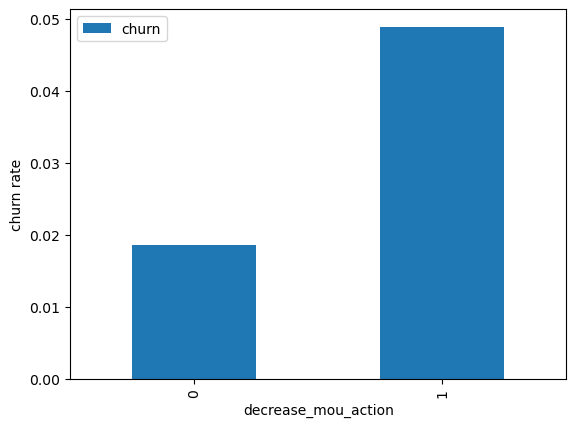

In [81]:
data.pivot_table(values='churn', index='decrease_mou_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

***Analysis***

We can see that the churn rate is more for the customers, whose minutes of usage(mou) decreased in the action phase than the good phase. 

##### Churn rate on the basis whether the customer decreased her/his number of recharge in action month

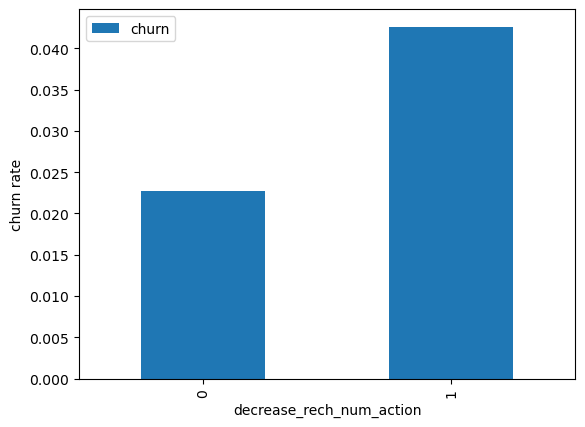

In [82]:
data.pivot_table(values='churn', index='decrease_rech_num_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

***Analysis***

As expected, the churn rate is more for the customers, whose number of recharge in the action phase is lesser than the number in good phase.

##### Churn rate on the basis whether the customer decreased her/his amount of recharge in action month

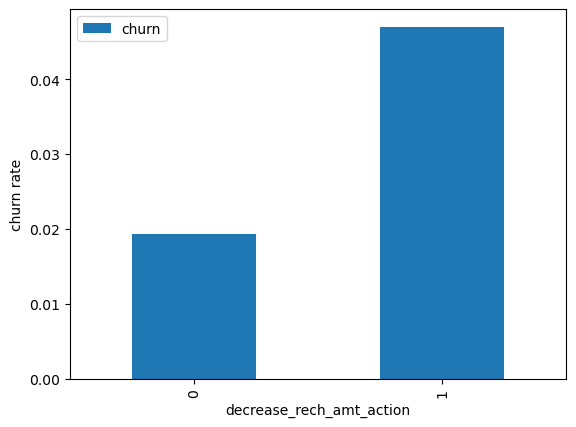

In [83]:
data.pivot_table(values='churn', index='decrease_rech_amt_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

***Analysis***

Here also we see the same behaviour. The churn rate is more for the customers, whose amount of recharge in the action phase is lesser than the amount in good phase.

##### Churn rate on the basis whether the customer decreased her/his volume based cost in action month

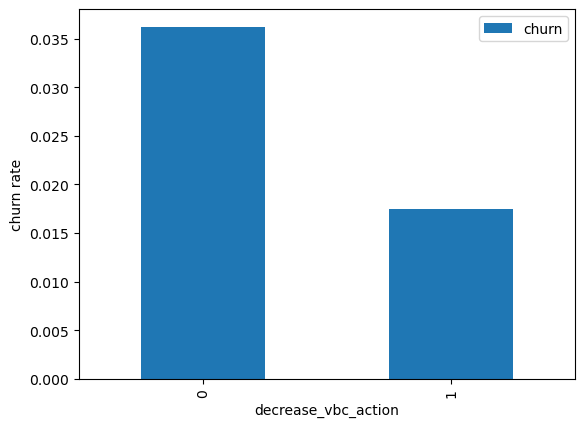

In [84]:
data.pivot_table(values='churn', index='decrease_vbc_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

***Analysis***

Here we see the expected result. The churn rate is more for the customers, whose volume based cost in action month is increased. That means the customers do not do the monthly recharge more when they are in the action phase.

##### Analysis of the average revenue per customer (churn and not churn) in the action phase

In [85]:
# Creating churn dataframe
data_churn = data[data['churn'] == 1]
# Creating not churn dataframe
data_non_churn = data[data['churn'] == 0]

(-300.0, 5000.0)

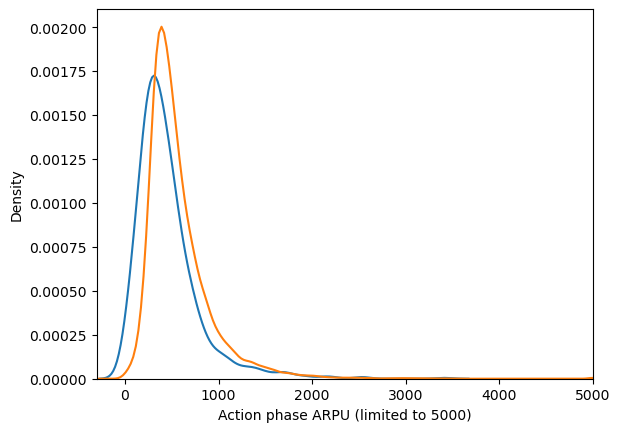

In [86]:
# Define a function to convert and limit values
def limit_and_convert(data, limit):
  return [min(val, limit) for val in data]

# Apply the function to both datasets
data_churn['avg_arpu_action'] = limit_and_convert(data_churn['avg_arpu_action'], 5000)
data_non_churn['avg_arpu_action'] = limit_and_convert(data_non_churn['avg_arpu_action'], 5000)

# Create the distribution plot
ax = sns.distplot(data_churn['avg_arpu_action'], label='churn', hist=False)
ax = sns.distplot(data_non_churn['avg_arpu_action'], label='not churn', hist=False)

# Set the x-axis label and limit
ax.set(xlabel='Action phase ARPU (limited to 5000)')
ax.set_xlim(-300, 5000)  # Optional to set the visible range

Average revenue per user (ARPU) for the churned customers is mostly densed on the 0 to 900. The higher ARPU customers are less likely to be churned.

ARPU for the not churned customers is mostly densed on the 0 to 1000. 

##### Analysis of the minutes of usage MOU (churn and not churn) in the action phase

In [87]:
# Distribution plot
ax = sns.distplot(data_churn['total_mou_good'],label='churn',hist=False)
ax = sns.distplot(data_non_churn['total_mou_good'],label='non churn',hist=False)
ax.set(xlabel='Action phase MOU')

[Text(0.5, 0, 'Action phase MOU')]

Minutes of usage(MOU) of the churn customers is mostly populated on the 0 to 2500 range. Higher the MOU, lesser the churn probability.

### Bivariate analysis

##### Analysis of churn rate by the decreasing recharge amount and number of recharge in the action phase

In [88]:
data.pivot_table(values='churn', index='decrease_rech_amt_action', columns='decrease_rech_num_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

***Analysis***

We can see from the above plot, that the churn rate is more for the customers, whose recharge amount as well as number of recharge have decreased in the action phase than the good phase.

##### Analysis of churn rate by the decreasing recharge amount and volume based cost in the action phase

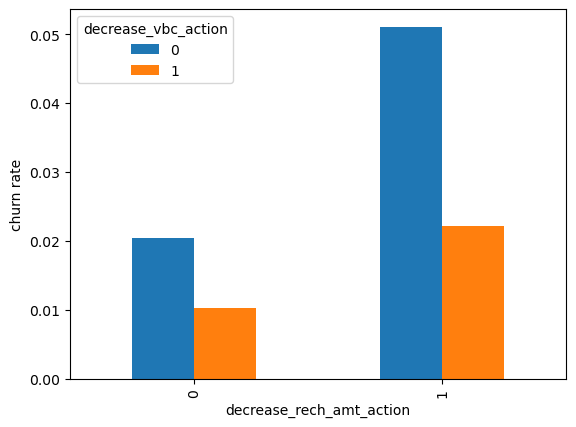

In [89]:
data.pivot_table(values='churn', index='decrease_rech_amt_action', columns='decrease_vbc_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

***Analysis***

Here, also we can see that the churn rate is more for the customers, whose recharge amount is decreased along with the volume based cost is increased in the action month.

##### Analysis of recharge amount and number of recharge in action month

In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27991 entries, 8 to 99997
Columns: 152 entries, mobile_number to decrease_vbc_action
dtypes: float64(120), int32(5), int64(26), object(1)
memory usage: 32.1+ MB


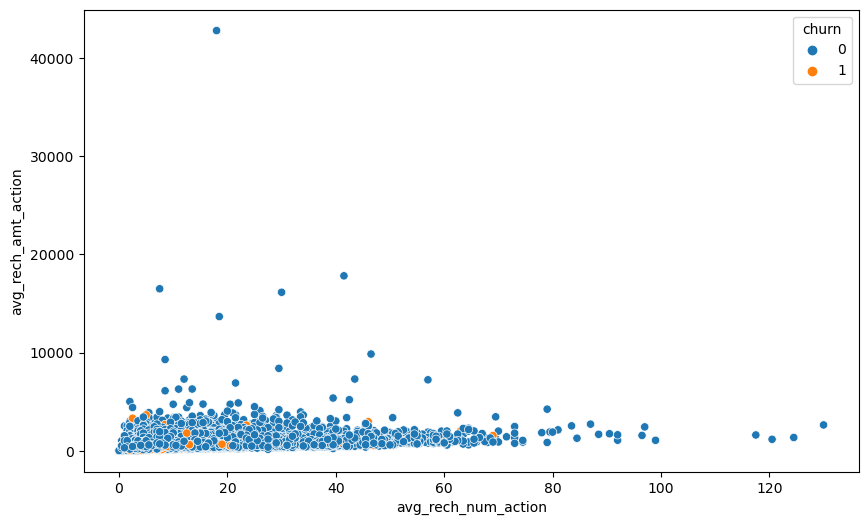

In [91]:
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(data=data, x='avg_rech_num_action', y='avg_rech_amt_action',hue='churn')
ax.set(xlabel='avg_rech_num_action')
ax.set(ylabel='avg_rech_amt_action')
plt.show()

***Analysis***

We can see from the above pattern that the recharge number and the recharge amount are mostly propotional. More the number of recharge, more the amount of the recharge.

#### Dropping few derived columns, which are not required in further analysis

In [92]:
data = data.drop(['total_mou_good','avg_mou_action','diff_mou','avg_rech_num_action','diff_rech_num','avg_rech_amt_action',
                 'diff_rech_amt','avg_arpu_action','diff_arpu','avg_vbc_3g_action','diff_vbc','avg_rech_amt_6_7'], axis=1)

## Train - Test Split

In [93]:
from sklearn.model_selection import train_test_split


In [94]:
X = data.drop(['mobile_number','churn'], axis=1)

In [95]:
y = data['churn']
y = y.astype(int)

In [96]:
y.mean()

0.0339037547783216

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)


### Dealing with data imbalance

We are creating synthetic samples by doing upsampling using SMOTE(Synthetic Minority Oversampling Technique).

In [98]:
# Imporing SMOTE
!pip install imblearn
from imblearn.over_sampling import SMOTE
!pip install threadpoolctl
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import pandas as pd 

In [99]:
smt = SMOTE(random_state=27)
X_train, y_train = smt.fit_resample(X_train, y_train)

y_train.value_counts()

0    21631
1    21631
Name: churn, dtype: int64

### Feature Scaling

In [100]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [101]:
# List of the numeric columns
cols_scale = X_train.columns.to_list()
# Removing the derived binary columns 
cols_scale.remove('decrease_mou_action')
cols_scale.remove('decrease_rech_num_action')
cols_scale.remove('decrease_rech_amt_action')
cols_scale.remove('decrease_arpu_action')
cols_scale.remove('decrease_vbc_action')

In [102]:
# Fit the data into scaler and transform
X_train[cols_scale] = scaler.fit_transform(X_train[cols_scale])

In [103]:
X_train.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0  0.603749 -0.465405 -0.312555    -0.483709    -0.491485    -0.327058   
1 -0.858896 -0.249776 -0.400178    -0.617972    -0.591831    -0.367886   
2  1.975640  2.177858  0.975364     2.512350     4.668092     2.136049   
3  0.694506  1.523064  0.657463     0.253329     0.483528     0.582296   
4 -0.603826 -0.434541 -0.166659    -0.558975    -0.575942    -0.435100   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0     -0.571144     -0.604157     -0.475679      -0.261054      -0.249314   
1     -0.652975     -0.537386     -0.352228      -0.261054      -0.063168   
2      3.458738      2.208258      1.604723      -0.261054      -0.249314   
3      1.205607      1.644060      1.602047      -0.261054      -0.249314   
4     -0.254129      0.017003      0.221074      -0.261054      -0.249314   

   roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0      -0.293831      -0.297503      -0.349837      -0.362522   
1      -0.293831      -0.297503      -0.207452      -0.362522   
2      -0.293831      -0.297503      -0.349837      -0.362522   
3      -0.293831      -0.297503      -0.349837      -0.362522   
4      -0.293831      -0.297503      -0.349837      -0.362522   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0          0.261299          0.050020          0.209146         -0.122976   
1         -0.083948         -0.103378          0.074572         -0.086454   
2          3.832305          7.498171          1.973060          1.238422   
3          2.403089          2.709441          2.415902          3.684822   
4          0.043648         -0.076152         -0.041487          0.511463   

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0         -0.054013         -0.174608          0.349336          0.178713   
1         -0.052189          0.176117          0.166402          0.821912   
2          3.204428          2.407965          0.238248         -0.263486   
3          3.940827          3.989748          1.146278          0.267390   
4          0.743548          1.113731         -0.166261         -0.204368   

   loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0         -0.186671         -0.182744         -0.253692         -0.223611   
1          0.007034         -0.182744         -0.253692          0.202268   
2         -0.248246         -0.182744          0.293907         -0.223611   
3          0.289253         -0.182744         -0.253692         -0.223611   
4         -0.138566         -0.182744         -0.253692         -0.223611   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0      0.097096      0.008626      0.002262         -0.556243   
1     -0.097632     -0.054305      0.158077         -0.573958   
2      3.128705      6.833658      2.710175          1.301262   
3      3.899136      4.220207      4.019714         -0.546225   
4      0.348491      0.401961      0.684847         -0.557663   

   std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0         -0.496109         -0.400927         -0.492565         -0.543397   
1         -0.542033         -0.384208         -0.587423         -0.541349   
2          1.999105          1.545024          3.209571          1.103481   
3         -0.522986         -0.405730         -0.552686         -0.483633   
4         -0.535259         -0.405730         -0.395612         -0.195649   

   std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0         -0.352753         -0.153413         -0.133735         -0.013129   
1         -0.420083         -0.153413         -0.133735         -0.121954   
2          0.656106         -0.053254         -0.072766         -0.050574   
3         -0.366398         19.887142         30.914590          3.434176   
4         -0.264819         -0.153413         -0.133735         -0.121954   



##### Scaling the test set
We don't fit scaler on the test set. We only transform the test set.

In [104]:
# Transform the test set
X_test[cols_scale] = scaler.transform(X_test[cols_scale])
X_test.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
7634  -0.340530 -0.835802 -0.728853    -0.658158    -0.634963    -0.519211   
40466 -0.685811 -0.484620  0.166416    -0.294705    -0.222979     0.372731   
53854  0.049121 -0.218331  0.598968     0.153300    -0.052071     0.724623   
95060 -0.455424 -0.437816  0.099978    -0.374117    -0.224241     0.267539   
92802  0.505387 -0.137418  0.305145     2.534184     1.124595     2.237244   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
7634      -0.178907     -0.456319     -0.286813      -0.261054      -0.249314   
40466     -0.656655     -0.615721     -0.362409       0.980783       0.979835   
53854     -0.647194     -0.584040     -0.421771      -0.261054      -0.249314   
95060     -0.542878     -0.519881     -0.080887       0.435033      -0.249314   
92802     -0.409872     -0.611454     -0.257595      -0.261054      -0.176739   

       roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
7634       -0.282211      -0.297503      -0.349837      -0.356093   
40466       0.528371       1.790463       2.054617       0.662261   
53854      -0.293831      -0.297503      -0.349837      -0.362522   
95060      -0.293831       0.053517      -0.349837      -0.362522   
92802      -0.293831      -0.297503      -0.247383      -0.362522   

       loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
7634          -0.270839         -0.242012         -0.278403          0.458500   
40466         -0.381184         -0.336053         -0.219244         -0.645572   
53854          2.186957          1.333511          2.759675         -0.037740   
95060         -0.310496         -0.297316         -0.233695         -0.165974   
92802         -0.319827         -0.206878         -0.186504         -0.559425   

       loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
7634           0.128537         -0.124631         -0.183769         -0.263486   
40466         -0.637974         -0.501387         -0.271916         -0.263486   
53854          0.074147          0.076633         -0.233880         -0.263486   
95060         -0.169669         -0.056395         -0.178336         -0.263486   
92802         -0.539041         -0.456053         -0.235691         -0.263486   

       loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
7634          -0.150111         -0.182744         -0.182810         -0.223611   
40466         -0.248246         -0.182744         -0.253692         -0.223611   
53854         -0.157808         -0.182744         -0.253692         -0.223611   
95060         -0.025037         -0.182744         -0.253692         -0.223611   
92802         -0.239908         -0.182744         -0.253692         -0.223611   

       loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
7634       0.123431     -0.091182     -0.253636         -0.549718   
40466     -0.662951     -0.628882     -0.466056         -0.573958   
53854      1.283320      0.895104      1.682454         -0.573958   
95060     -0.304644     -0.312477     -0.176584         -0.304342   
92802     -0.568158     -0.483674     -0.416971          2.792940   

       std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
7634          -0.531713         -0.390035         -0.295547         -0.446086   
40466         -0.542033          0.322076         -0.587423         -0.563480   
53854         -0.542033         -0.405730         -0.587423         -0.563480   
95060         -0.075040          0.472671         -0.477617         -0.391454   
92802          1.285336          2.662702         -0.127105         -0.338723   

       std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
7634          -0.157836         -0.153413         -0.133735         -0.121954   
40466         -0.206804         -0.153413         -0.133735         -0.121954   
53854         -0.430773         

# Modeling with PCA

In [105]:
from sklearn.decomposition import PCA

In [106]:
pca = PCA(random_state=42)
pca.fit(X_train)

PCA(random_state=42)

In [107]:
pca.components_

array([[ 6.73546258e-02,  9.55429995e-02,  1.36557504e-01, ...,
        -2.17726894e-02, -2.18300400e-02,  2.01624334e-02],
       [ 1.30624524e-01,  1.50226217e-01,  1.16568316e-01, ...,
        -7.54055000e-03, -7.64542234e-03, -1.72639336e-02],
       [ 1.33796367e-01,  1.60469513e-01,  1.25973278e-01, ...,
        -7.76349481e-03, -8.98163293e-03,  1.12113956e-02],
       ...,
       [-1.51534869e-08, -1.72535737e-07,  5.17773229e-07, ...,
        -1.41643642e-07, -1.96186490e-07,  2.21739807e-07],
       [-3.23962001e-07,  1.67439138e-07,  2.10689654e-07, ...,
        -1.84330634e-07, -1.13531252e-07,  2.70107383e-07],
       [ 3.21519914e-07, -9.24715960e-08,  1.42574548e-07, ...,
        -2.07652911e-07,  5.18744495e-08,  1.19270692e-09]])

In [108]:
variance_cumu = np.cumsum(pca.explained_variance_ratio_)
print(variance_cumu)

[0.11364212 0.19416316 0.26110328 0.31084541 0.35166495 0.38695784
 0.42077539 0.45123643 0.47726896 0.50216775 0.5256915  0.54697191
 0.56731532 0.58702907 0.60595978 0.62293101 0.63844245 0.65320288
 0.66685192 0.67952107 0.69196947 0.70419192 0.71527805 0.72629052
 0.73695443 0.74713807 0.75677367 0.76580219 0.77471028 0.78311883
 0.79133725 0.79871925 0.80592117 0.81302375 0.8199554  0.82654334
 0.83296492 0.83919393 0.84523247 0.85115472 0.85676973 0.86215534
 0.86730546 0.87230072 0.87726152 0.88158868 0.88586759 0.8900852
 0.89420124 0.898188   0.90210386 0.90568467 0.90923173 0.91260032
 0.91592421 0.91917648 0.92232377 0.92544679 0.92837588 0.93118228
 0.93386275 0.93651931 0.93911537 0.94168349 0.94416846 0.94663672
 0.94907023 0.95142086 0.95366222 0.95580781 0.95792919 0.96000364
 0.96205864 0.96402127 0.96582154 0.9676006  0.96932539 0.97100121
 0.97263843 0.97423444 0.97578571 0.97730692 0.97876818 0.98020132
 0.98159374 0.98293931 0.98418735 0.98537268 0.98649565 0.98757

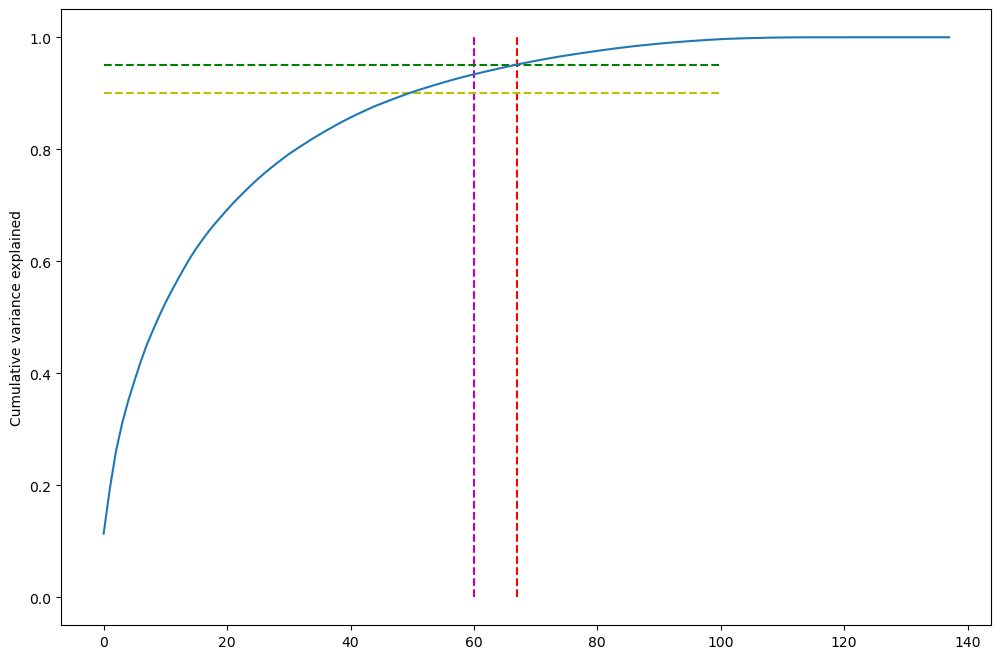

In [109]:

fig = plt.figure(figsize=[12,8])
plt.vlines(x=67, ymax=1, ymin=0, colors="r", linestyles="--")
plt.vlines(x=60, ymax=1, ymin=0, colors="m", linestyles="--")
plt.hlines(y=0.95, xmax=100, xmin=0, colors="g", linestyles="--")
plt.hlines(y=0.90, xmax=100, xmin=0, colors="y", linestyles="--")
plt.plot(variance_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

We can see that `60 components` explain amost more than 90% variance of the data. So, we will perform PCA with 60 components.

In [110]:
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=60)
X_train_pca = pca_final.fit_transform(X_train)

In [111]:
X_test_pca = pca_final.transform(X_test)

In [112]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

#### Emphasize Sensitivity/Recall than Accuracy

We are more focused on higher Sensitivity/Recall score than the accuracy.

Beacuse we need to care more about churn cases than the not churn cases. The main goal is to retain the customers, who have the possibility to churn. There should not be a problem, if we consider few not churn customers as churn customers and provide them some incentives for retaining them. Hence, the sensitivity score is more important here.

## Modeling using Logistic Regression

In [113]:
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as recall as we are more focused on acheiving the higher sensitivity than the accuracy
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'recall', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_pca, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='recall', verbose=1)

In [114]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       0.233803      0.083710         0.003124        0.006248    0.01   
1       0.362039      0.038230         0.010381        0.008680     0.1   
2       0.359298      0.040737         0.003124        0.006249       1   
3       0.468644      0.060096         0.003124        0.006248      10   
4       0.403036      0.043520         0.003124        0.006249     100   
5       0.426430      0.066696         0.006259        0.007666    1000   

        params  split0_test_score  split1_test_score  split2_test_score  \
0  {'C': 0.01}           0.892496           0.897578           0.878213   
1   {'C': 0.1}           0.891320           0.896655           0.878213   
2     {'C': 1}           0.891084           0.897116           0.878676   
3    {'C': 10}           0.891084           0.897116           0.878676   
4   {'C': 100}           0.891084           0.896655           0.878444   
5  {'C': 1000}           0.891320           0.896886           0.878444   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0           0.899633           0.892269         0.892038        0.007480   
1           0.899403           0.891125         0.891343        0.007289   
2           0.899173           0.890439         0.891298        0.007155   
3           0.899633           0.890210         0.891344        0.007264   
4           0.899633           0.890210         0.891205        0.007274   
5           0.899633           0.890210         0.891299        0.007309   

   rank_test_score  split0_train_score  split1_train_score  \
0                1            0.893268            0.891998   
1                3            0.893613            0.892403   
2                5            0.893326            0.892345   
3                2            0.893326            0.892229   
4                6            0.893326            0.892229   
5                4            0.893326            0.892172   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.894235            0.893037            0.892636   
1            0.894524            0.892516            0.892230   
2            0.894697            0.892053            0.892172   
3            0.894697            0.892053            0.892230   
4            0.894697            0.892053            0.892056   
5            0.894697            0.892053            0.892114   

   mean_train_score  std_train_score  
0          0.893035         0.000739  
1          0.893057         0.000879  
2          0.892919         0.000996  
3          0.892907         0.001003  
4          0.892872         0.001028  
5          0.892872         0.001027

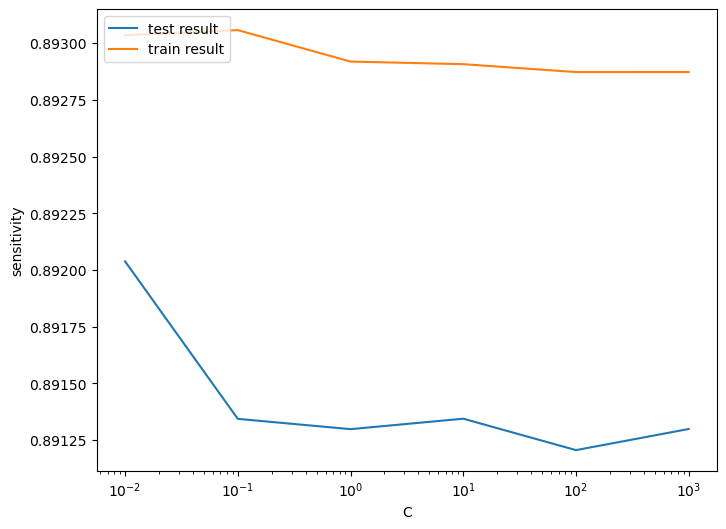

In [115]:
plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [116]:
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']
print(" The highest test sensitivity is {0} at C = {1}".format(best_score, best_C))

 The highest test sensitivity is 0.89203755869191 at C = 0.01


#### Logistic regression with optimal C

In [117]:
logistic_pca = LogisticRegression(C=best_C)

In [118]:
log_pca_model = logistic_pca.fit(X_train_pca, y_train)

In [119]:
y_train_pred = log_pca_model.predict(X_train_pca)

In [120]:
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[18065  3566]
 [ 2319 19312]]


In [121]:

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8639683787157321
Sensitivity:- 0.8927927511441912
Specificity:- 0.8351440062872729


### Making predictions

In [122]:
y_test_pred = log_pca_model.predict(X_test_pca)

In [123]:
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[4520  891]
 [  36  152]]


In [124]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.834434720485801
Sensitivity:- 0.8085106382978723
Specificity:- 0.8353354278321937


In [125]:
metrics.accuracy_score(y_test,y_test_pred)

0.834434720485801

In [126]:
print(metrics.classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.99      0.84      0.91      5411
           1       0.15      0.81      0.25       188

    accuracy                           0.83      5599
   macro avg       0.57      0.82      0.58      5599
weighted avg       0.96      0.83      0.88      5599



## Modeling using Decision tree

In [127]:
# Importing decision tree classifier
from sklearn.tree import DecisionTreeClassifier

##### Hyperparameter tuning

In [128]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


In [129]:
# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'recall',
                           cv = 5, 
                           verbose = 1)

In [130]:
# Fit the grid search to the data
grid_search.fit(X_train_pca,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='recall', verbose=1)

In [131]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       1.395975      0.107064         0.006239        0.007642   
1       1.227835      0.021216         0.009375        0.007655   
2       1.210190      0.006983         0.009362        0.007644   
3       1.341004      0.108098         0.012488        0.006244   
4       2.152831      0.136632         0.006253        0.007659   
5       2.105850      0.117437         0.003125        0.006250   
6       2.045540      0.156231         0.006244        0.007647   
7       1.987153      0.103382         0.006250        0.007655   

  param_max_depth param_min_samples_leaf param_min_samples_split  \
0               5                     50                      50   
1               5                     50                     100   
2               5                    100                      50   
3               5                    100                     100   
4              10                     50                      50   
5              10                     50                     100   
6              10                    100                      50   
7              10                    100                     100   

                                              params  split0_test_score  \
0  {'max_depth': 5, 'min_samples_leaf': 50, 'min_...           0.847665   
1  {'max_depth': 5, 'min_samples_leaf': 50, 'min_...           0.847665   
2  {'max_depth': 5, 'min_samples_leaf': 100, 'min...           0.835645   
3  {'max_depth': 5, 'min_samples_leaf': 100, 'min...           0.835645   
4  {'max_depth': 10, 'min_samples_leaf': 50, 'min...           0.892973   
5  {'max_depth': 10, 'min_samples_leaf': 50, 'min...           0.892973   
6  {'max_depth': 10, 'min_samples_leaf': 100, 'mi...           0.878872   
7  {'max_depth': 10, 'min_samples_leaf': 100, 'mi...           0.878872   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.877051           0.809986           0.836570           0.852982   
1           0.877051           0.809986           0.836570           0.852982   
2           0.869193           0.807675           0.834027           0.854369   
3           0.869193           0.807675           0.834027           0.854369   
4           0.896464           0.908460           0.887194           0.900601   
5           0.896464           0.908460           0.887194           0.900601   
6           0.879362           0.884882           0.883726           0.888350   
7           0.879362           0.884882           0.883726           0.888350   

   mean_test_score  std_test_score  rank_test_score  
0         0.844851        0.021886                5  
1         0.844851        0.021886                5  
2         0.840182        0.020776                7  
3         0.840182        0.020776                7  
4         0.897138        0.007168                1  
5         0.897138        0.007168                1  
6         0.883038        0.003548                3  
7         0.883038        0.003548                3

In [132]:
# Printing the optimal sensitivity score and hyperparameters
print("Best sensitivity:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best sensitivity:- 0.897138397408097
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50)


##### Model with optimal hyperparameters

In [133]:
# Model with optimal hyperparameters
dt_pca_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)

dt_pca_model.fit(X_train_pca, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50,
                       random_state=100)

##### Prediction on the train set

In [134]:
# Predictions on the train set
y_train_pred = dt_pca_model.predict(X_train_pca)

In [135]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[19308  2323]
 [ 1868 19763]]


In [136]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [137]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9031251444685867
Sensitivity:- 0.913642457584023
Specificity:- 0.8926078313531506


##### Prediction on the test set

In [138]:
# Prediction on the test set
y_test_pred = dt_pca_model.predict(X_test_pca)

In [139]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[4740  671]
 [  68  120]]


In [140]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [141]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8680121450258975
Sensitivity:- 0.6382978723404256
Specificity:- 0.875993346885973


***Model summary***

- Train set
    - Accuracy = 0.90
    - Sensitivity = 0.91
    - Specificity = 0.89
- Test set
    - Accuracy = 0.86
    - Sensitivity = 0.64
    - Specificity = 0.87
    
    
We can see from the model performance that the Sesitivity has been decreased while evaluating the model on the test set. However, the accuracy and specificity is quite good in the test set.

## Random forest with PCA

In [142]:
# Importing random forest classifier
from sklearn.ensemble import RandomForestClassifier

##### Hyperparameter tuning

In [143]:
param_grid = {
    'max_depth': range(5,10,5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'n_estimators': [100,200,300], 
    'max_features': [10, 20]
}


In [144]:
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, 
                           param_grid = param_grid, 
                           cv = 3,
                           n_jobs = -1,
                           verbose = 1, 
                           return_train_score=True)


In [ ]:
# Fit the model
grid_search.fit(X_train_pca, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


In [ ]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

##### Model with optimal hyperparameters

In [ ]:
# model with the best hyperparameters

rfc_model = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=50, 
                             min_samples_split=100,
                             max_features=20,
                             n_estimators=300)

In [ ]:
# Fit the model
rfc_model.fit(X_train_pca, y_train)

##### Prediction on the train set

In [ ]:
# Predictions on the train set
y_train_pred = rfc_model.predict(X_train_pca)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

##### Prediction on the test set

In [ ]:
# Prediction on the test set
y_test_pred = rfc_model.predict(X_test_pca)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

***Model summary***

- Train set
    - Accuracy = 0.85
    - Sensitivity = 0.85
    - Specificity = 0.85
- Test set
    - Accuracy = 0.85
    - Sensitivity = 0.72
    - Specificity = 0.85
    
    
We can see from the model performance that the Sesitivity has been decreased while evaluating the model on the test set. However, the accuracy and specificity is quite good in the test set.

### Final conclusion with PCA
After trying several models we can see that for acheiving the best sensitivity, which was our ultimate goal, the classic Logistic regression . For both the models the sensitivity was approx 81%. Also we have good accuracy of apporx 85%.

## Business recomendation

In [ ]:
log_pca_model.coef_

In [ ]:
coef_df = pd.DataFrame()
coef_df['Coefficients'] = log_pca_model.coef_[0]
coef_df['Variables'] = ["var"+str(i) for i in range(len(coef_df))]

In [ ]:
coef_df = coef_df[['Variables','Coefficients']]

In [ ]:
coef_df.sort_values('Coefficients')

#### Top predictors

Below are few top variables selected in the logistic regression model.



We can see most of the top variables have negative coefficients. That means, the variables are inversely correlated with the churn probablity.



***Recomendations***

1. Target the customers, whose minutes of usage of the incoming local calls and outgoing ISD calls are less in the action phase (mostly in the month of August).
2. Target the customers, whose outgoing others charge in July and incoming others on August are less.
3. Also, the customers having value based cost in the action phase increased are more likely to churn than the other customers. Hence, these customers may be a good target to provide offer.
4. Cutomers, whose monthly 3G recharge in August is more, are likely to be churned. 
5. Customers having decreasing STD incoming minutes of usage for operators T to fixed lines of T for the month of August are more likely to churn.
6. Cutomers decreasing monthly 2g usage for August are most probable to churn.
7. Customers having decreasing incoming minutes of usage for operators T to fixed lines of T for August are more likely to churn.
8. roam_og_mou_8 variables have positive coefficients (0.7135). That means for the customers, whose roaming outgoing minutes of usage is increasing are more likely to churn.


#### Plots of important predictors for churn and non churn customers

In [ ]:
# Plotting loc_ic_mou_8 predictor for churn and not churn customers
fig = plt.figure(figsize=(10,6))
sns.distplot(data_churn['loc_ic_mou_8'],label='churn',hist=False)
sns.distplot(data_non_churn['loc_ic_mou_8'],label='not churn',hist=False)
plt.show()

We can see that for the churn customers the minutes of usage for the month of August is mostly populated on the lower side than the non churn customers.

In [ ]:
# Plotting isd_og_mou_8 predictor for churn and not churn customers
fig = plt.figure(figsize=(10,6))
sns.distplot(data_churn['isd_og_mou_8'],label='churn',hist=False)
sns.distplot(data_non_churn['isd_og_mou_8'],label='not churn',hist=False)
plt.show()

We can see that the ISD outgoing minutes of usage for the month of August for churn customers is densed approximately to zero. On the onther hand for the non churn customers it is little more than the churn customers.

In [ ]:
# Plotting monthly_3g_8 predictor for churn and not churn customers
fig = plt.figure(figsize=(10,6))
sns.distplot(data_churn['monthly_3g_8'],label='churn',hist=False)
sns.distplot(data_non_churn['monthly_3g_8'],label='not churn',hist=False)
plt.show()

The number of mothly 3g data for August for the churn customers are very much populated aroud 1, whereas of non churn customers it spreaded accross various numbers.

Similarly we can plot each variables, which have higher coefficients, churn distribution.